<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Supervised_Learning_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🩺PREDICTING DIABETES USING MACHINE LEARNING**

## **Problem Definition**
Diabetes is a chronic disease that affects millions of people worldwide. Early prediction of diabetes can help in taking preventive measures and improving health outcomes. In this project, we aim to build a **machine learning model** to predict whether a person has diabetes based on medical diagnostic features.

## **Dataset Description**
The dataset used in this project comes from the **Diabetes Dataset**. It contains several medical predictor variables and a binary outcome indicating the presence or absence of diabetes.

### **📊 Variables in Dataset**
1. **Pregnancies** – Number of times pregnant
2. **Glucose** – Plasma glucose concentration over 2 hours in an oral glucose tolerance test
3. **BloodPressure** – Diastolic blood pressure (mm Hg)
4. **SkinThickness** – Triceps skin fold thickness (mm)
5. **Insulin** – 2-Hour serum insulin (mu U/ml)
6. **BMI** – Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction** – A function that represents the likelihood of diabetes based on family history
8. **Age** – Age in years
9. **Outcome** – **Target Variable** (1 = Diabetes, 0 = No Diabetes)

## **Task Objective**
- **Supervised Classification Task**: The goal is to develop a **binary classification model** that predicts whether a patient has diabetes (**Outcome = 1**) or not (**Outcome = 0**).
- The model will be trained using **Machine Learning Classifiers** and evaluated based on accuracy, precision, recall, and F1-score.

## **Steps in the Project**
1. **Data Preprocessing**:
   - Handle missing or incorrect values (e.g., replacing zeros in medical variables with median values).
   - Standardize the numerical features for better model performance.
   
2. **Exploratory Data Analysis (EDA)**:
   - Visualize feature distributions.
   - Analyze correlations between features and the target variable.

3. **Model Training & Evaluation**:
   - Train a **Logistic Regression** model as a baseline.
   - Train a more advanced **Decision Trees, Support Vector Machines, Random Forest** model for improved accuracy.
   - Compare models using classification metrics.

4. **Result Interpretation**:
   - Present accuracy, confusion matrices, and classification reports.
   - Discuss which model performs better and why.
5. **Deploy Model**:
  
---

✅ **Expected Outcome**: A machine learning model that can **effectively predict diabetes** based on patient features and help in early diagnosis and intervention.

🚀 **Next Step**: Let preprocess data and start building the models!


In [1]:
### data manupulation
import pandas as pd
import numpy as np

### data visisualization
import matplotlib.pyplot as plt
import seaborn as sns


### modeling and metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Load Data

In [2]:
### mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Projects /Diabetics/diabetes.csv')
df = pd.read_csv('https://raw.githubusercontent.com/UnitForDataScience/ML-DL-Open-Lab-Series/refs/heads/main/Open%20Lab%202/diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

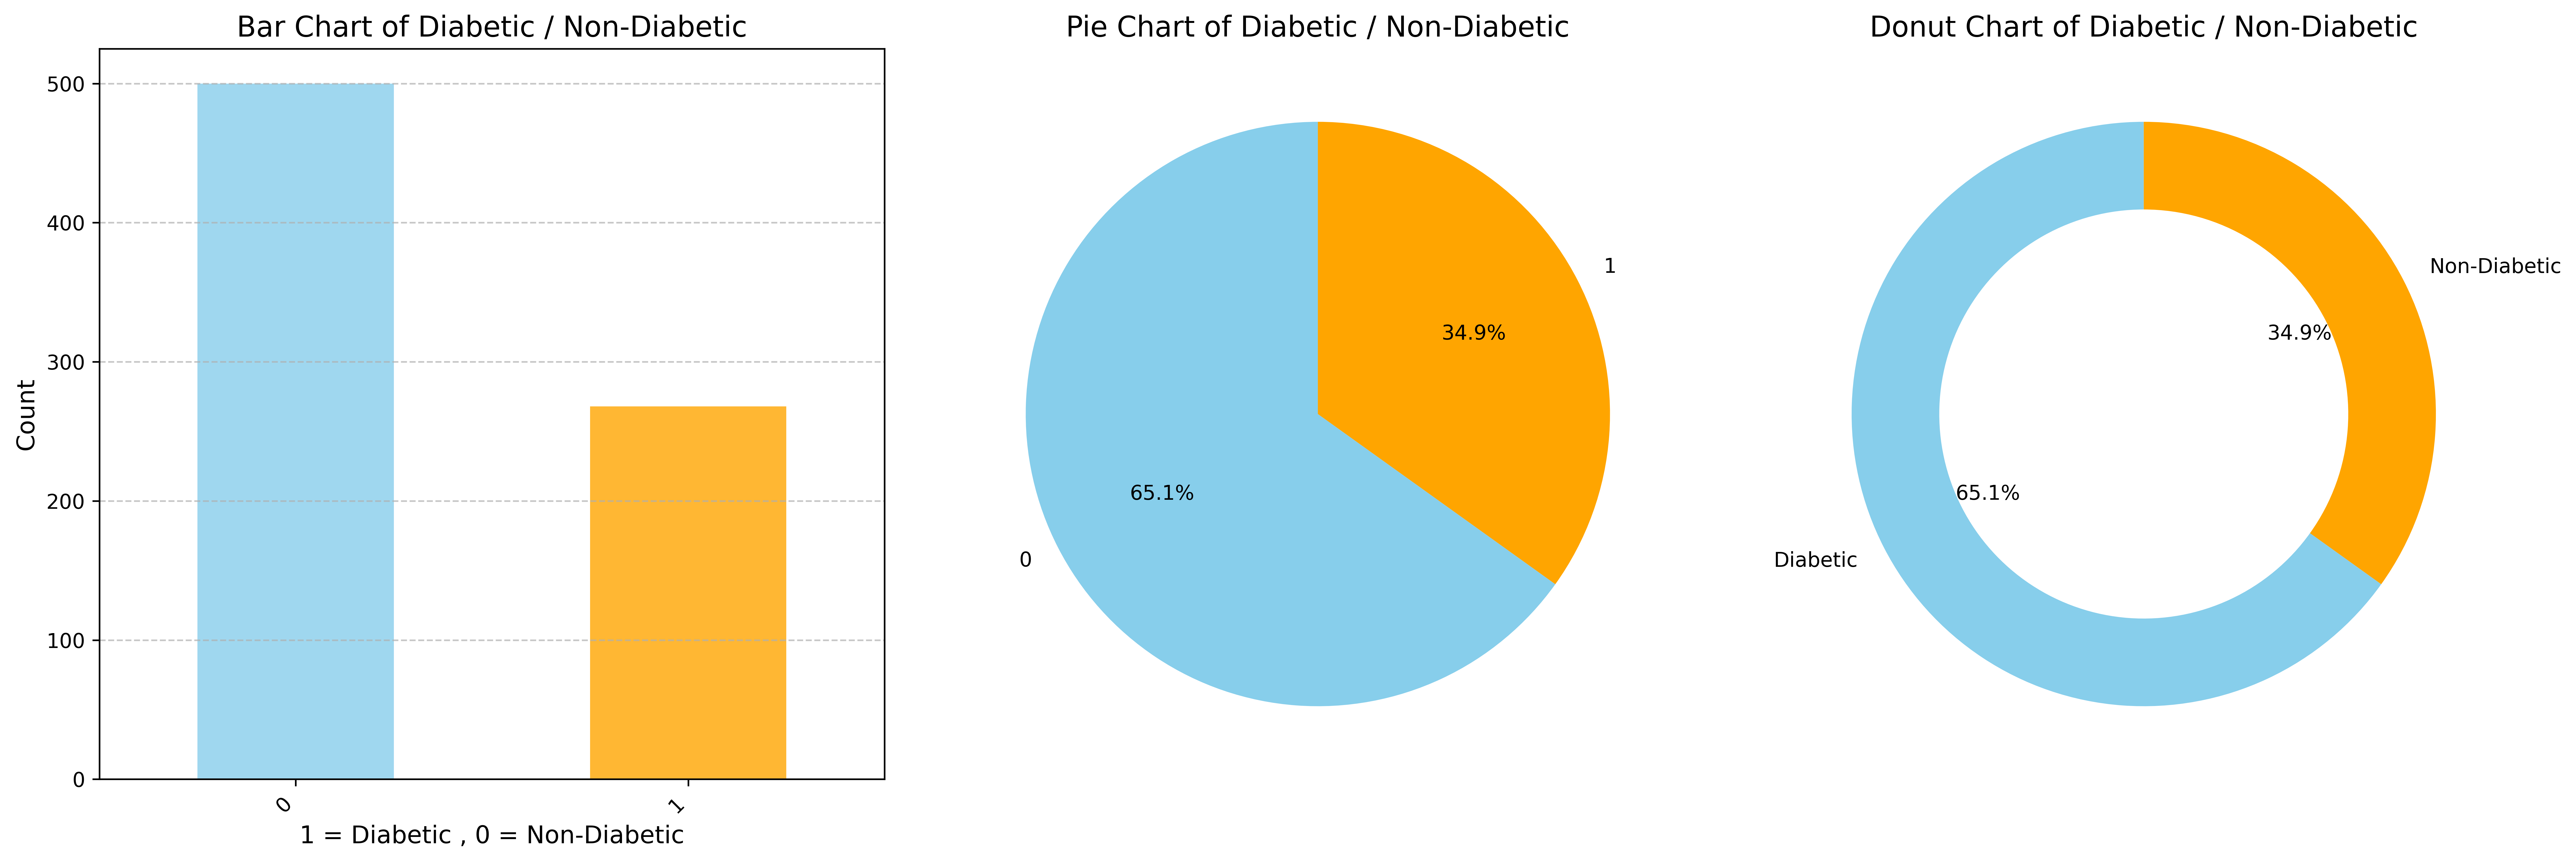

In [8]:
### set figure space with 3 subplots - one row, three columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=600)

### bar chart
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8, ax=axs[0])
axs[0].set_title("Bar Chart of Diabetic / Non-Diabetic", fontsize=14)
axs[0].set_xlabel("1 = Diabetic , 0 = Non-Diabetic", fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")

### pie chart
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, ax=axs[1])
axs[1].set_title("Pie Chart of Diabetic / Non-Diabetic", fontsize=14)
axs[1].set_ylabel("")

### donut plot
counts = df['Outcome'].value_counts()
axs[2].pie(counts, labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, wedgeprops=dict(width=0.3))
axs[2].set_title("Donut Chart of Diabetic / Non-Diabetic", fontsize=14)

### adjust layout(set tight to fit space here)
plt.tight_layout()
plt.show()

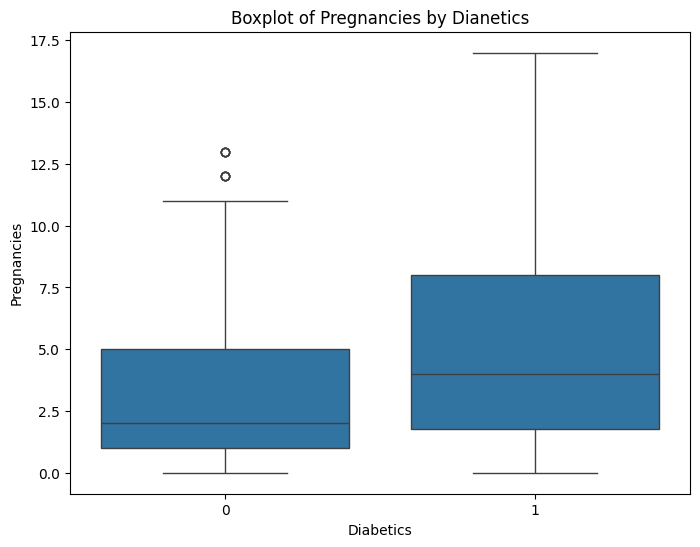

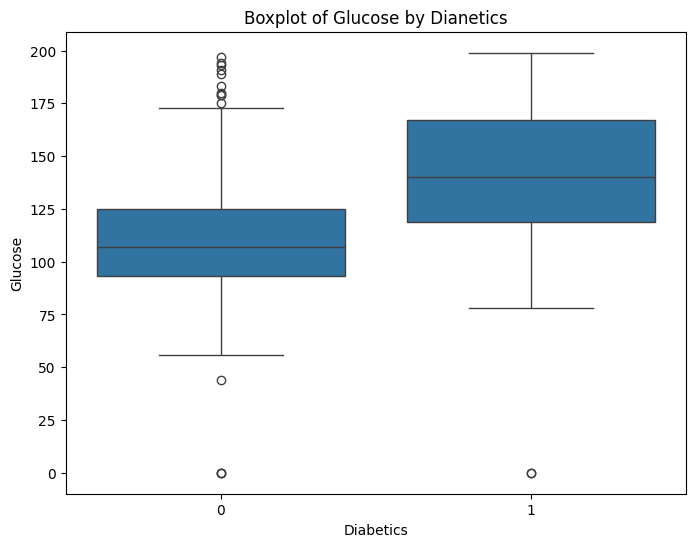

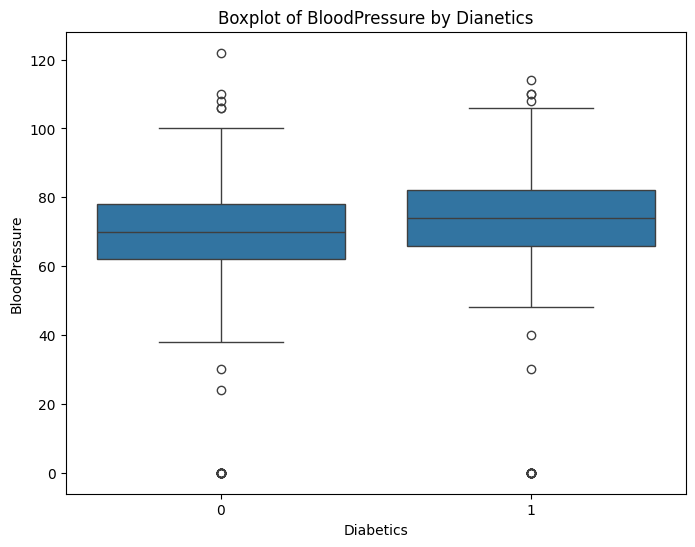

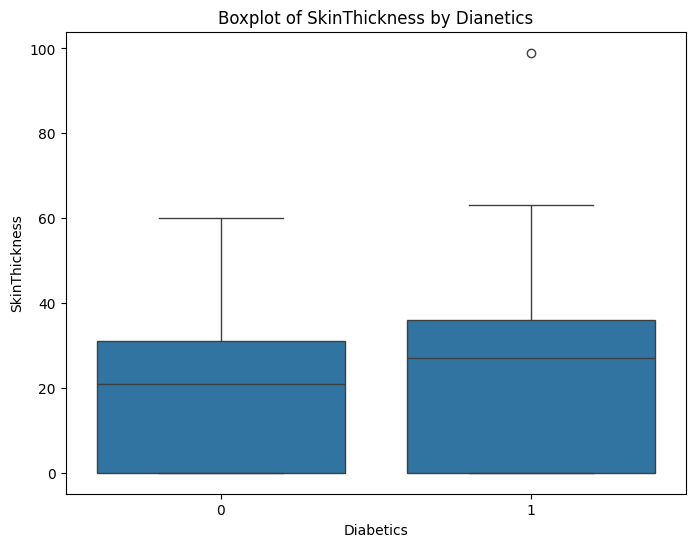

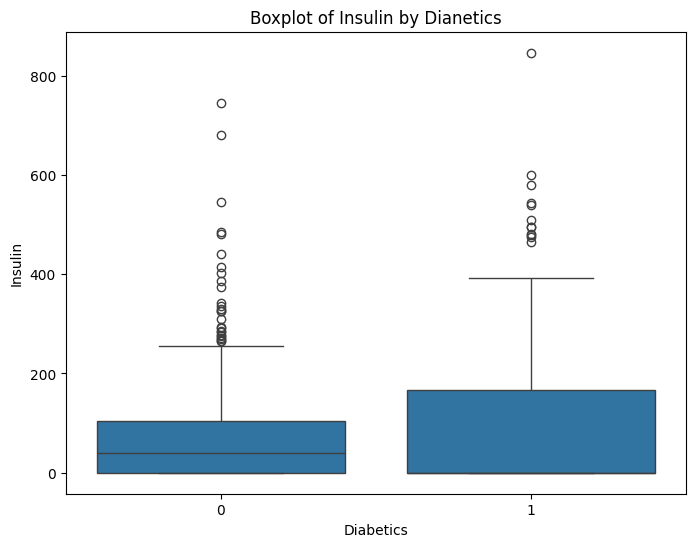

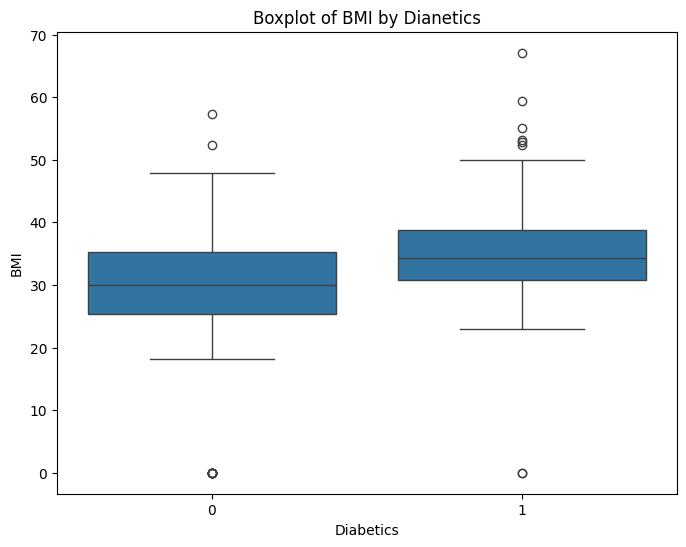

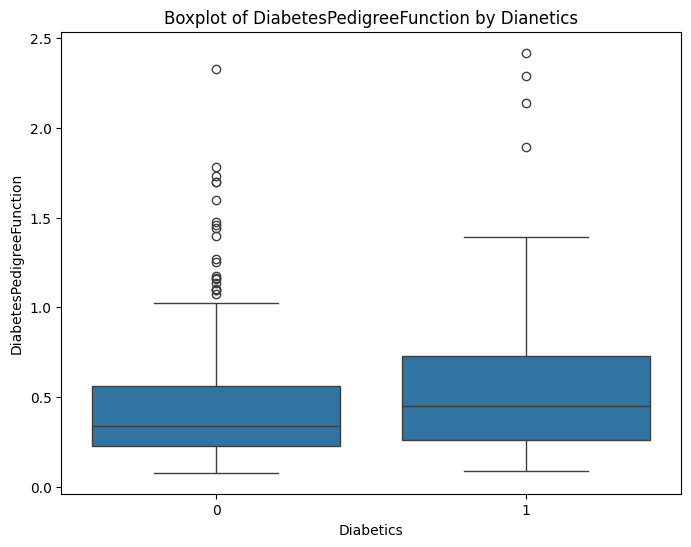

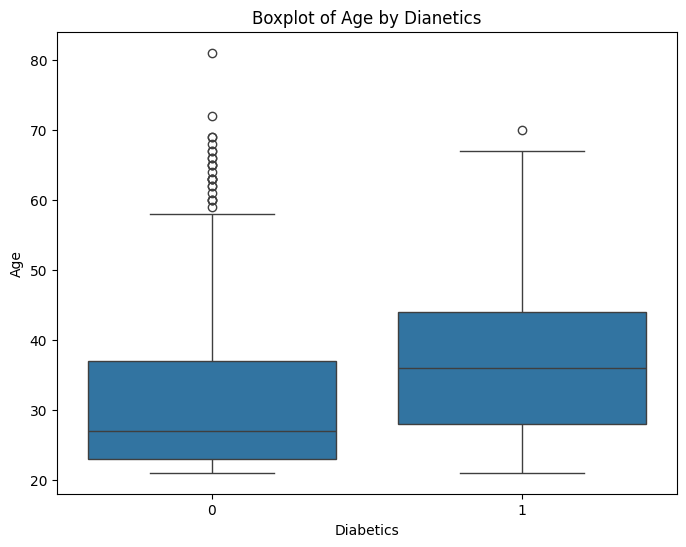

In [9]:
### loop for boxplots
for col in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot of {col} by Dianetics')
    plt.xlabel('Diabetics')
    plt.ylabel(col)
    plt.show()

## Data Preprocessing

In [10]:
X = df[features]
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
### standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Predictive Modeling with Decision Tree

In [13]:
##### train model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
##### make predictions
y_pred = dtree.predict(X_test)
y_pred_prob = dtree.predict_proba(X_test)[:, 1]

In [15]:
##### evaluation: accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7467532467532467

In [16]:
#### evaluation - classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



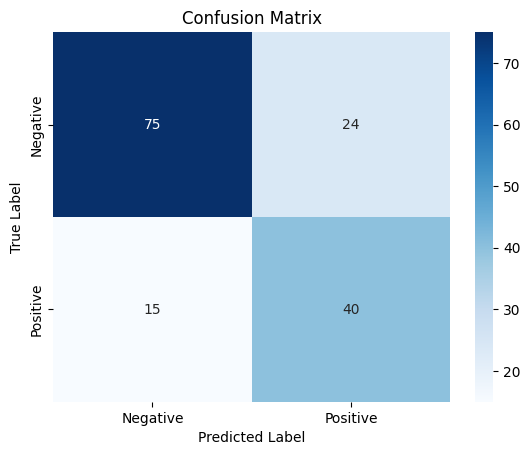

In [17]:
#### evaluation - confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

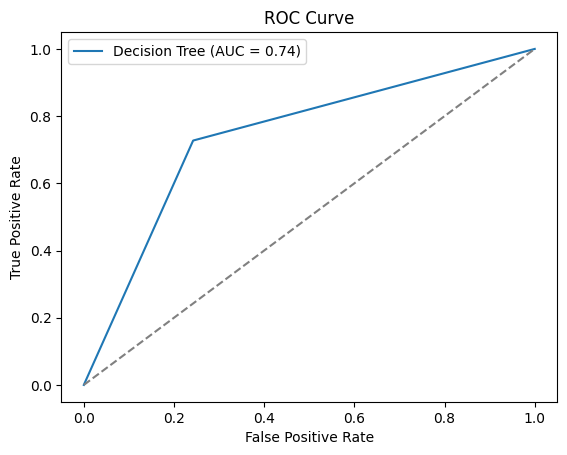

In [18]:
#### evaluation: ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
#### hyperparamter optimization
param_grid = {
    'criterion': ['gini', 'entropy'],  ### splitting criteria
    'max_depth': [5, 10, 15, None],  ### maximum depth of tree
    'min_samples_split': [2, 5, 10],  ### minimum samples required to split internal node
    'min_samples_leaf': [1, 2, 5]  ### minimum samples required to be at leaf node
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

### best parameters
print(f"Best parameters: {grid_search.best_params_}")

### best nodel
best_dtree = grid_search.best_estimator_

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [20]:
##### finally, save model
import joblib
joblib.dump(best_dtree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

## Predictive Modeling with ML Classifiers(Looping)


Training Logistic Regression

Logistic Regression Results:
Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



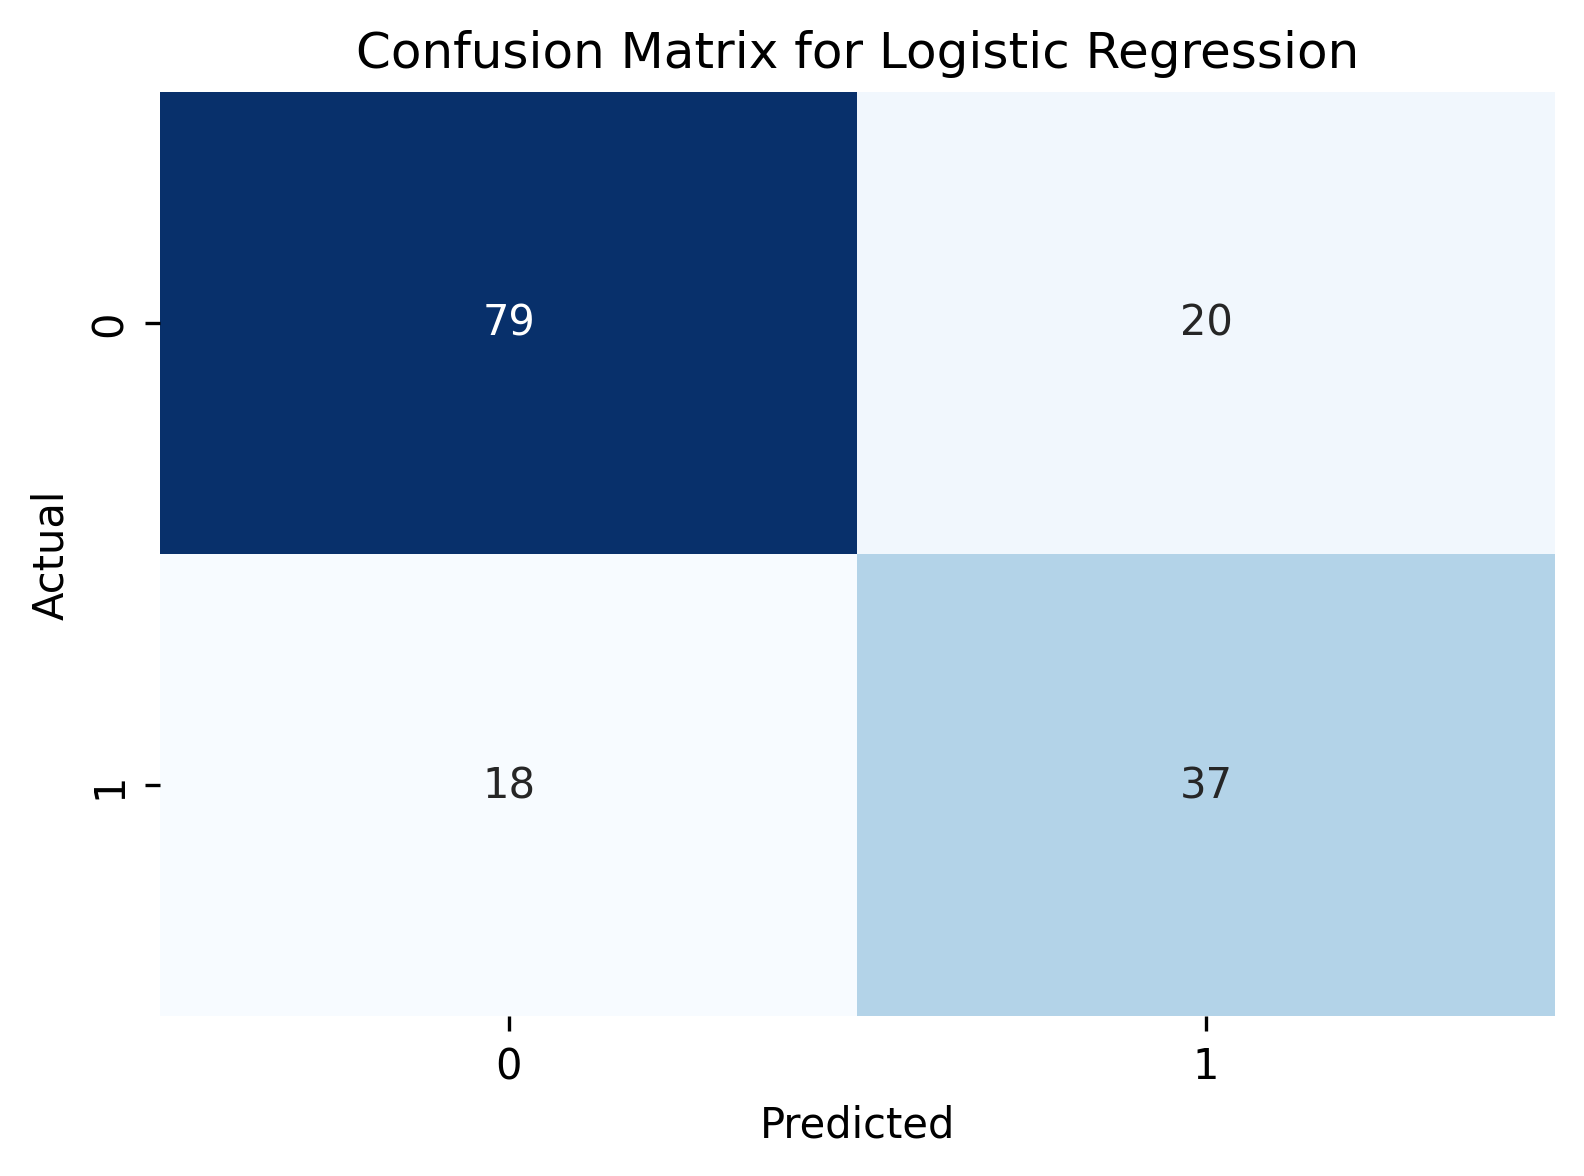


Training Random Forest

Random Forest Results:
Accuracy: 0.72
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



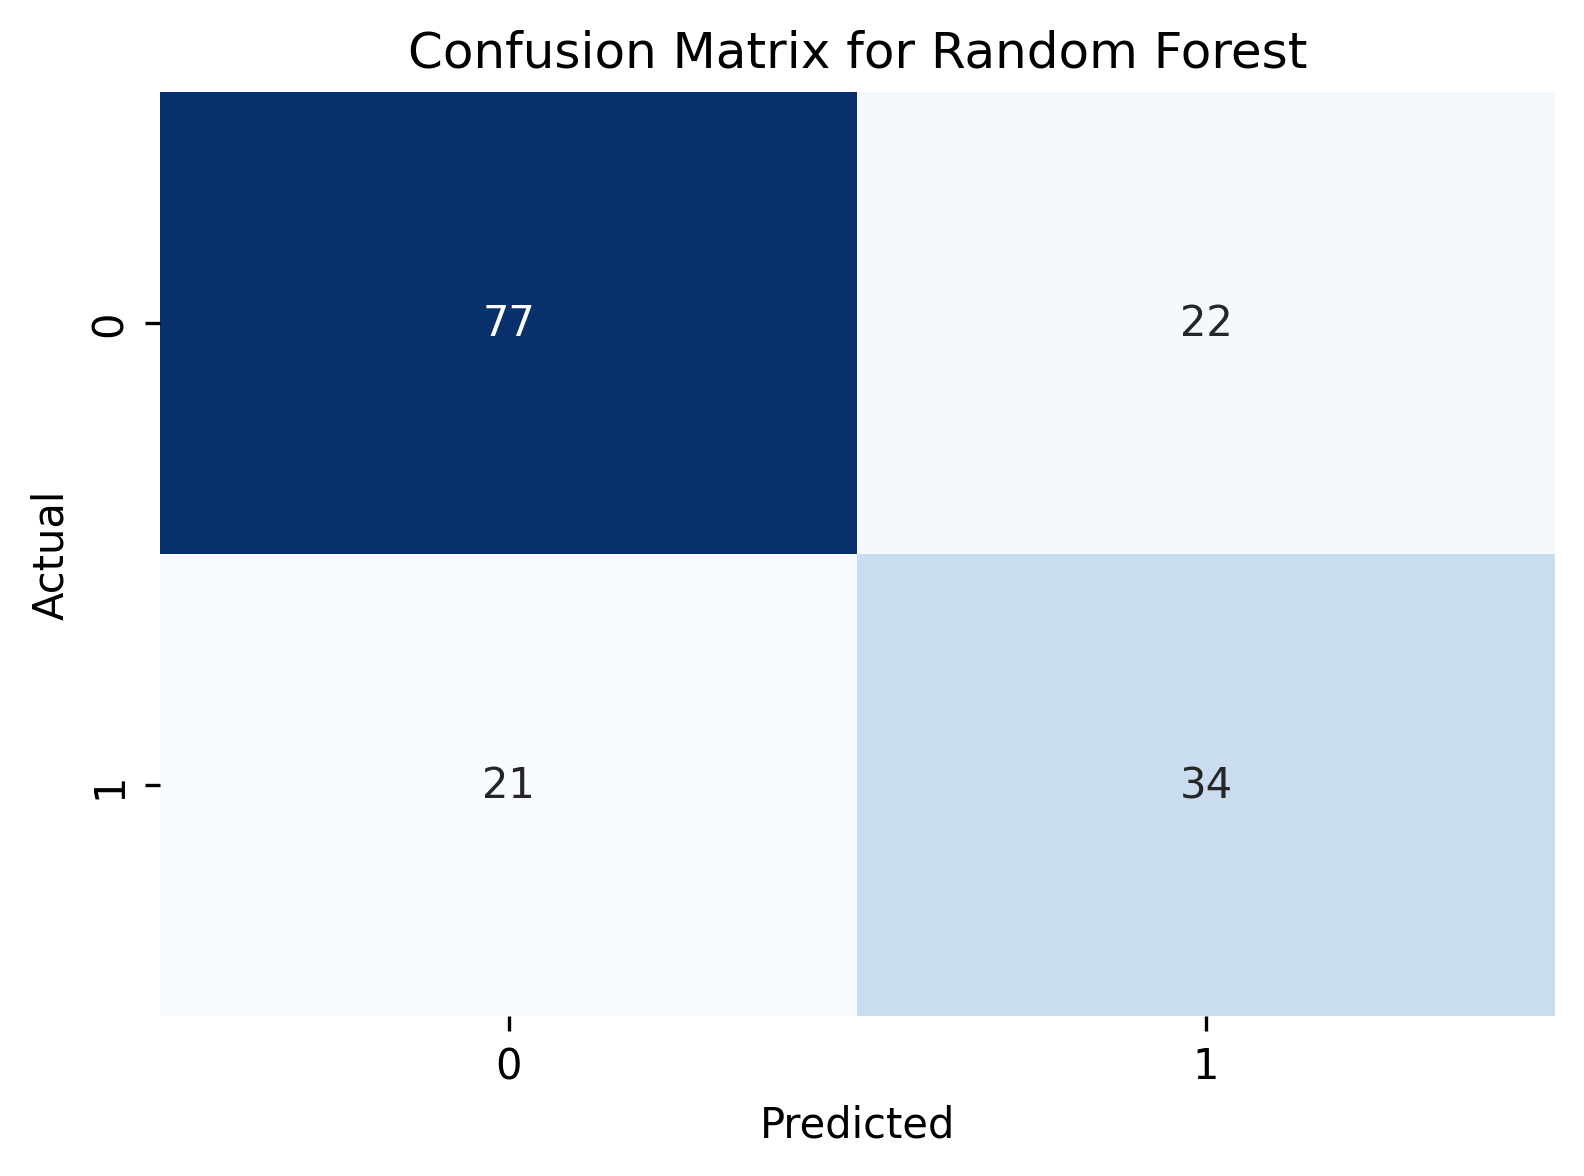


Training Gradient Boosting

Gradient Boosting Results:
Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



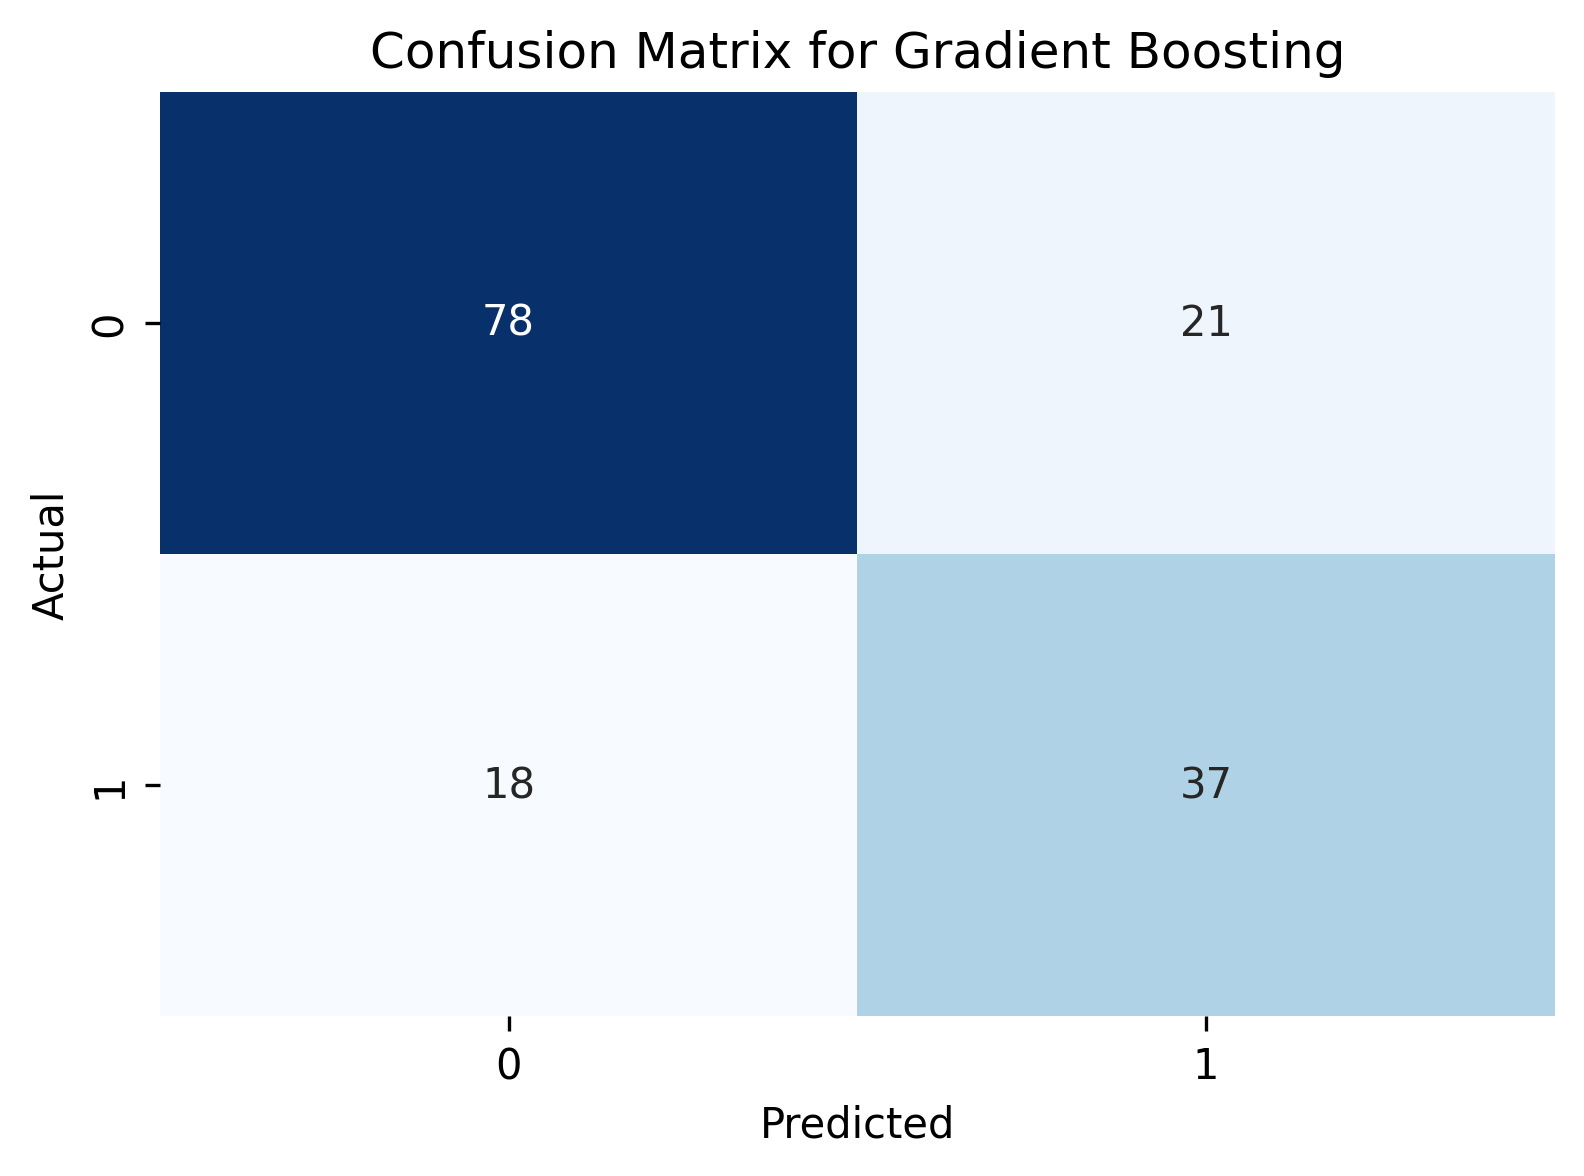


Training XGBoost

XGBoost Results:
Accuracy: 0.71
Confusion Matrix:
[[73 26]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



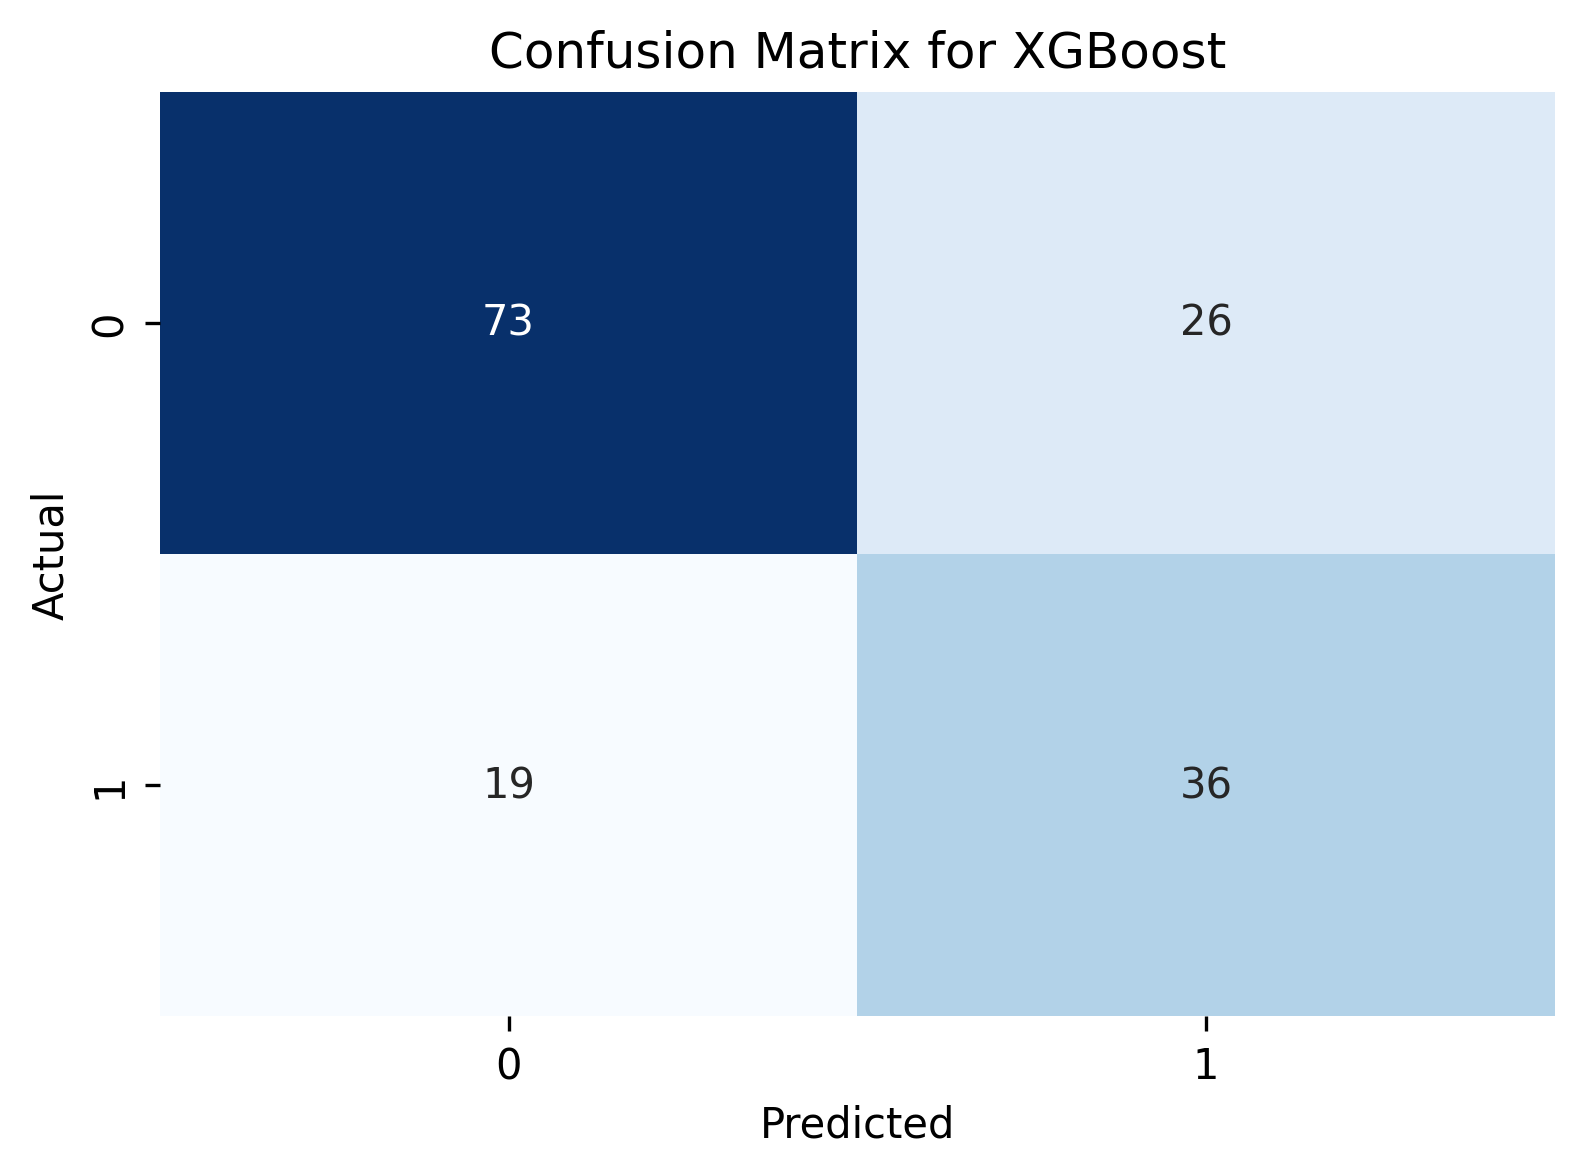


Training Support Vector Classifier

Support Vector Classifier Results:
Accuracy: 0.73
Confusion Matrix:
[[82 17]
 [24 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



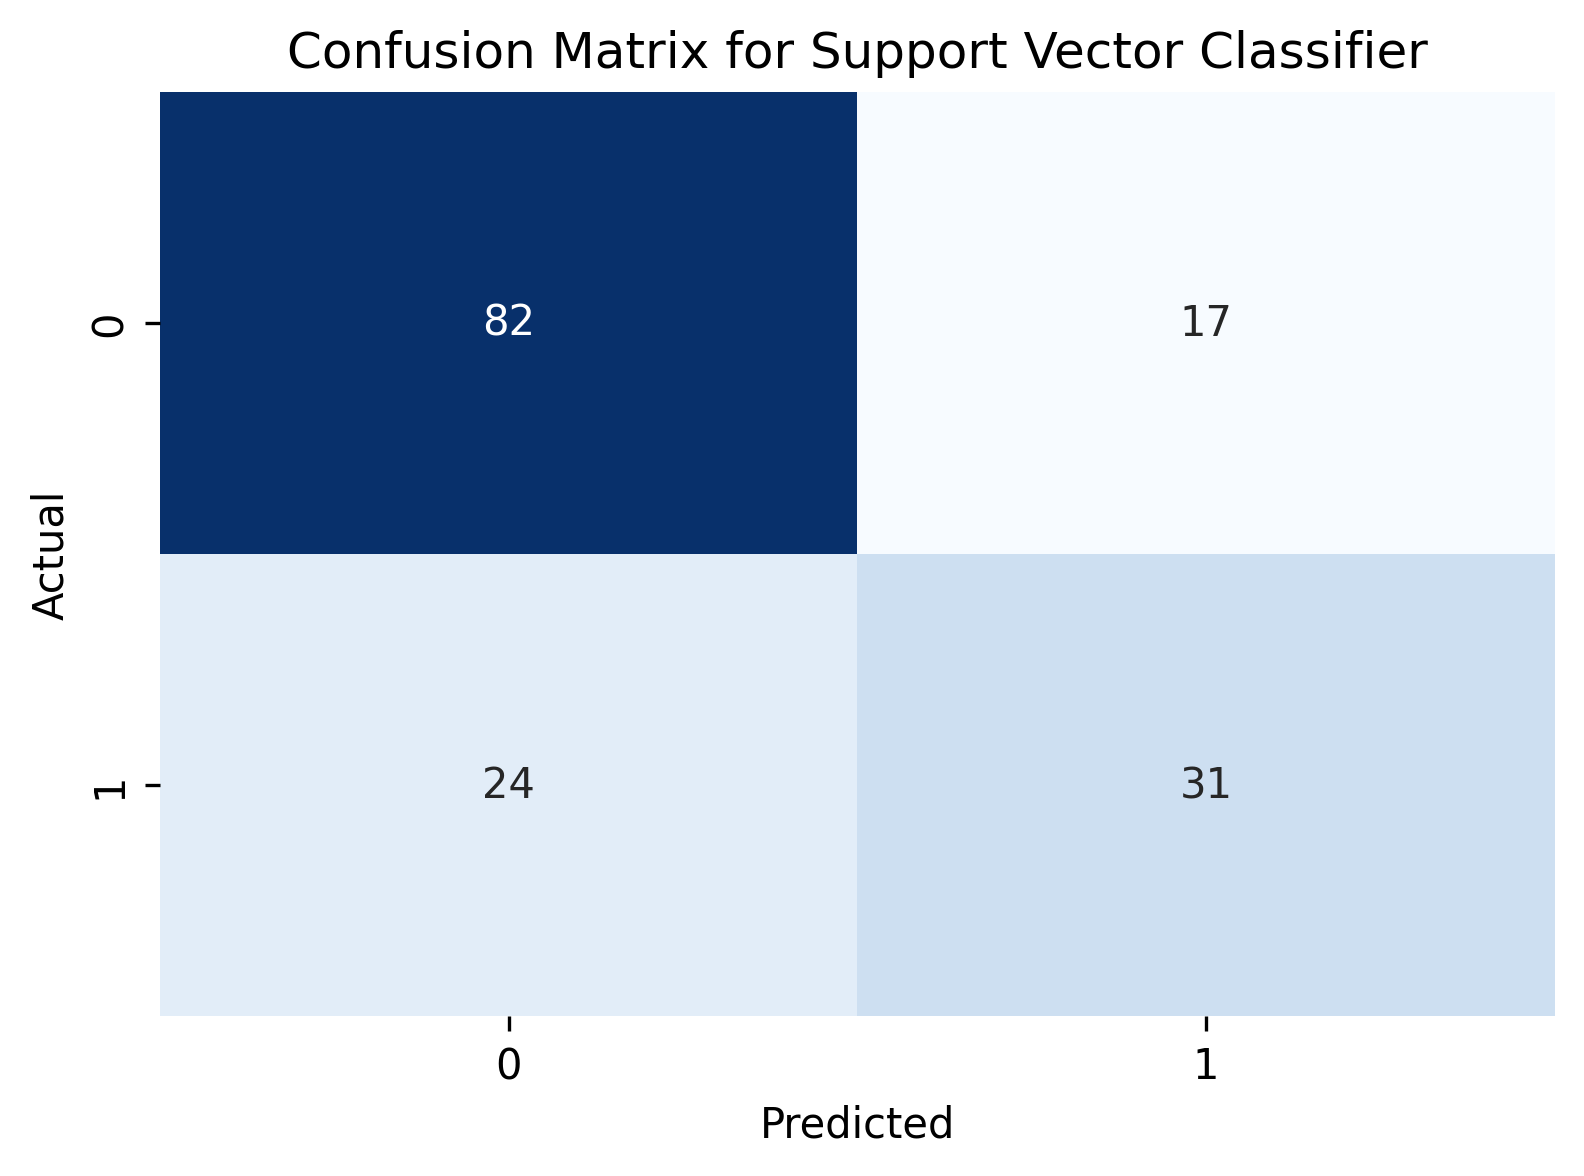


Training Linear SVM

Linear SVM Results:
Accuracy: 0.75
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



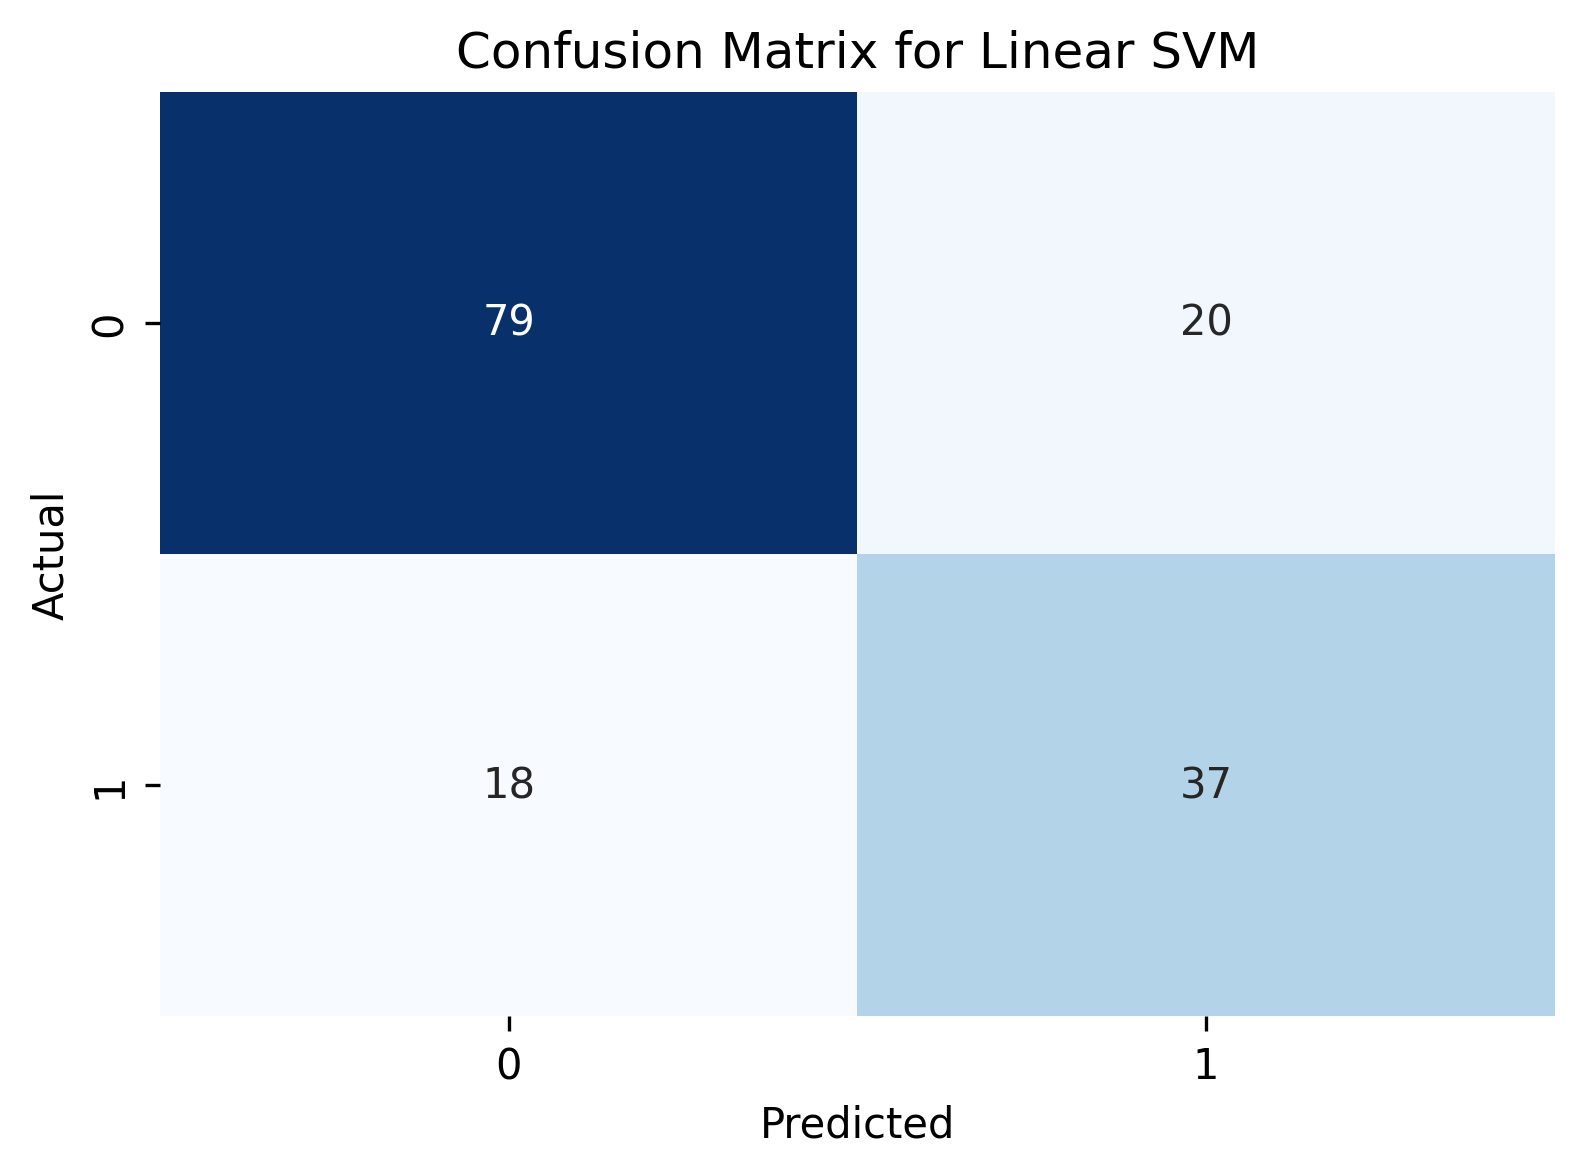


Training Decision Tree

Decision Tree Results:
Accuracy: 0.75
Confusion Matrix:
[[75 24]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



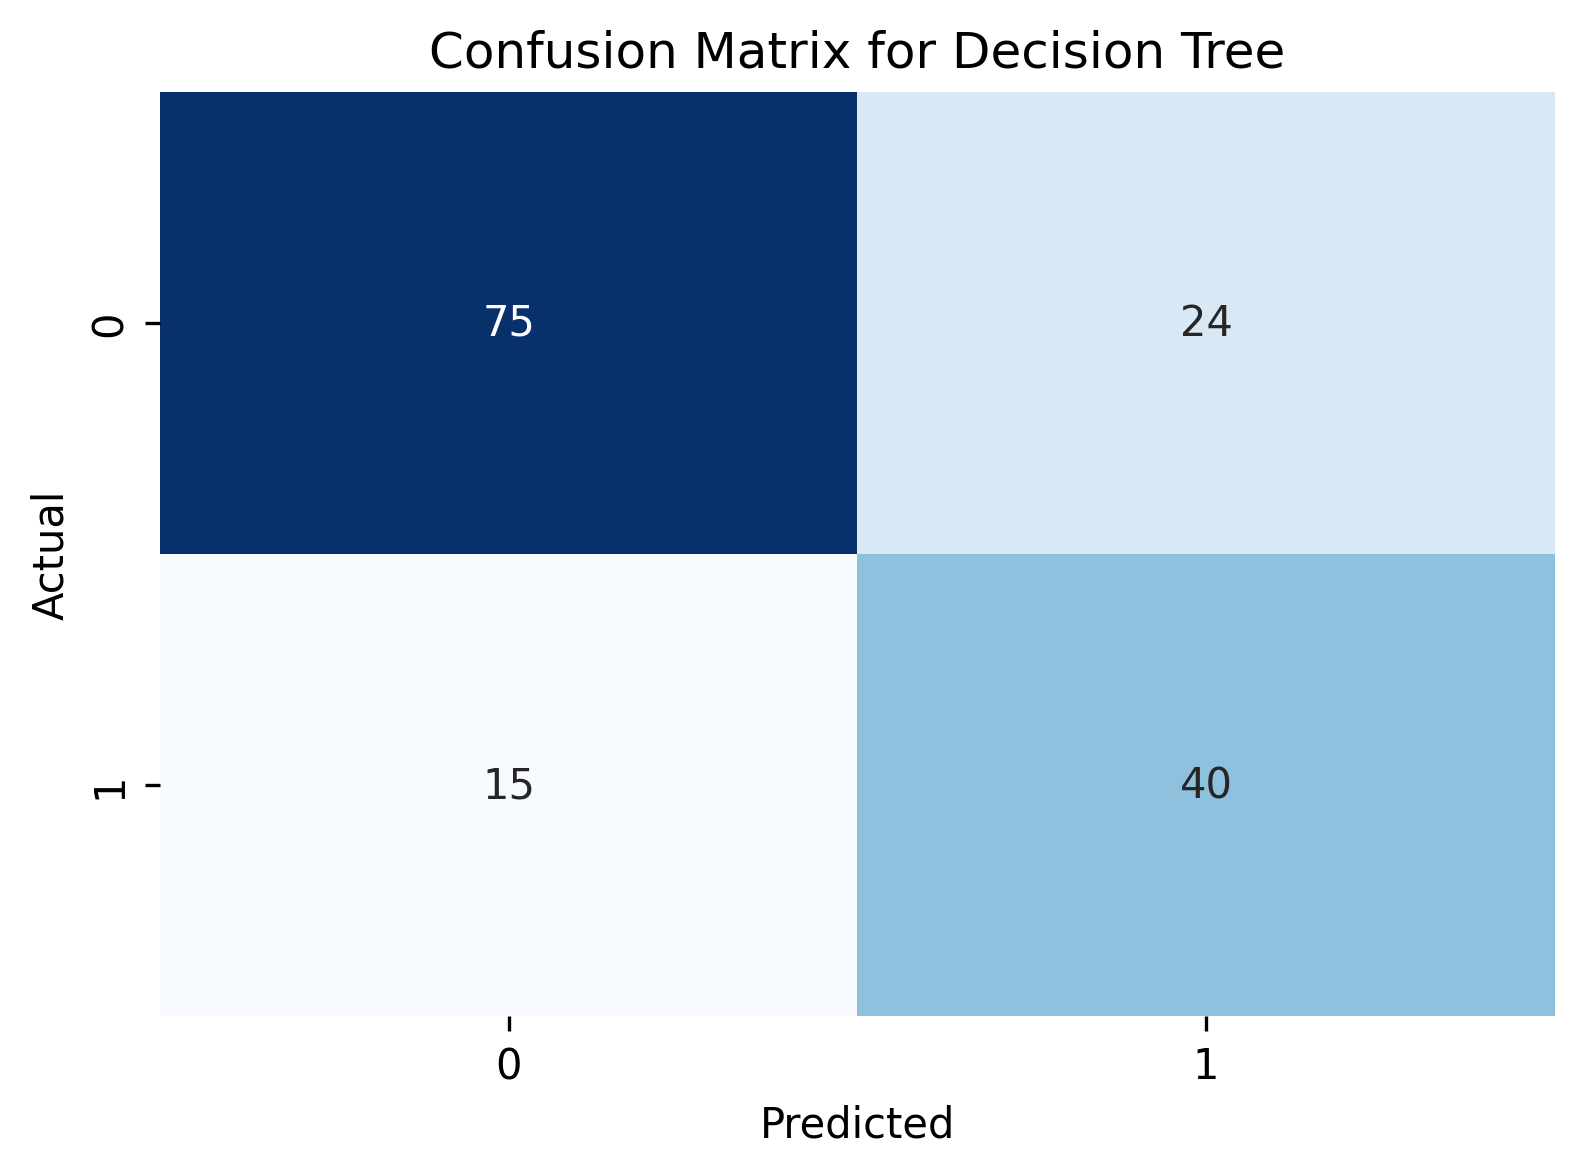


Training K-Nearest Neighbors

K-Nearest Neighbors Results:
Accuracy: 0.69
Confusion Matrix:
[[79 20]
 [27 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



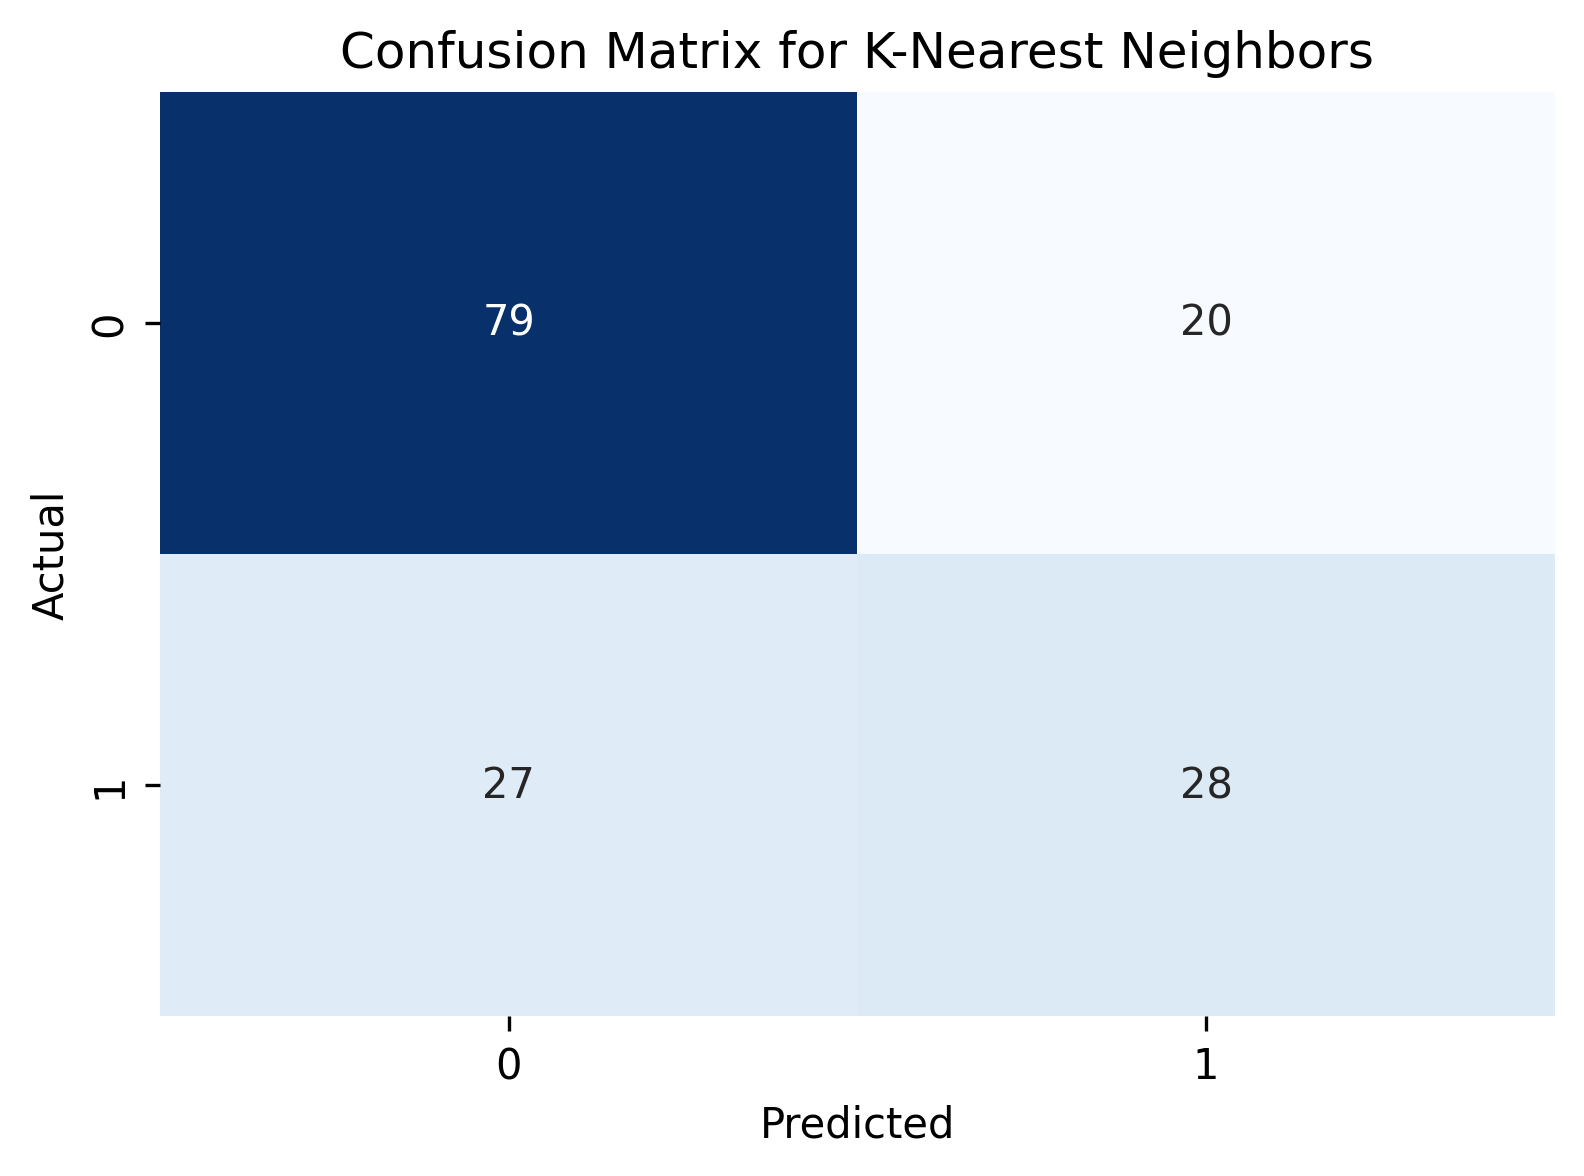


Training Naive Bayes

Naive Bayes Results:
Accuracy: 0.77
Confusion Matrix:
[[79 20]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



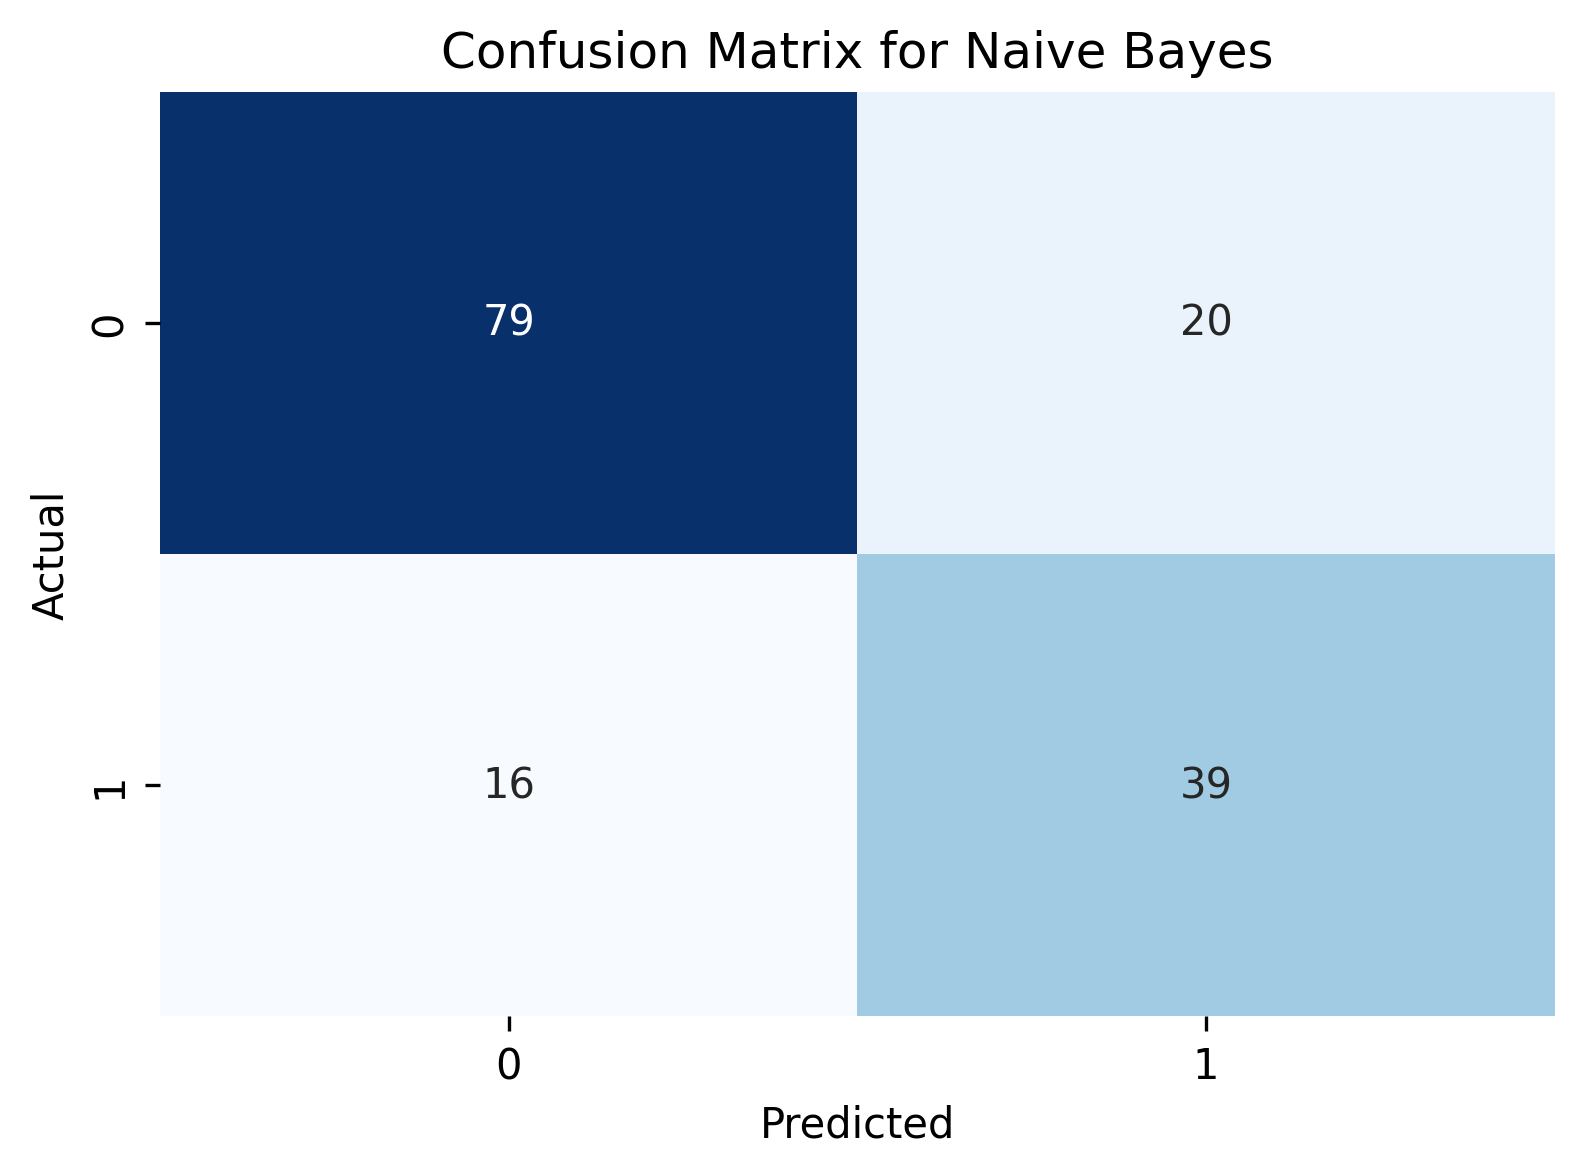


Training Neural Network (MLP)

Neural Network (MLP) Results:
Accuracy: 0.72
Confusion Matrix:
[[79 20]
 [23 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



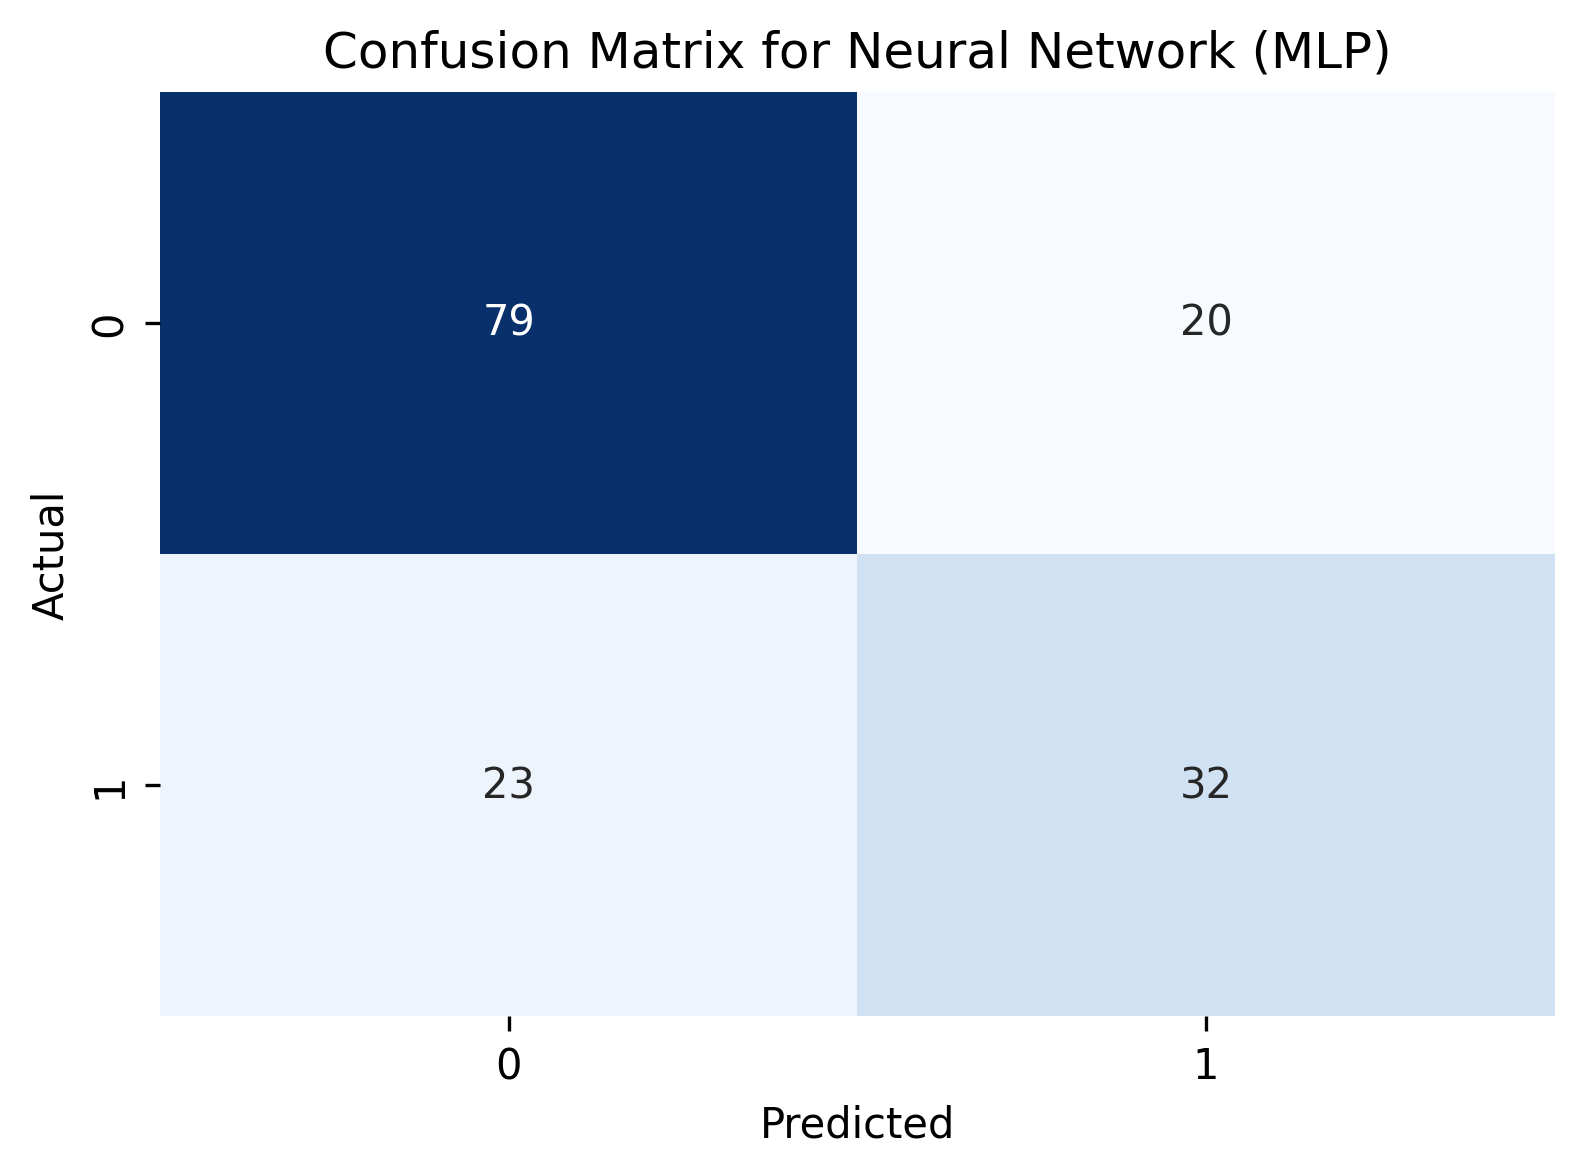


Training AdaBoost

AdaBoost Results:
Accuracy: 0.78
Confusion Matrix:
[[80 19]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



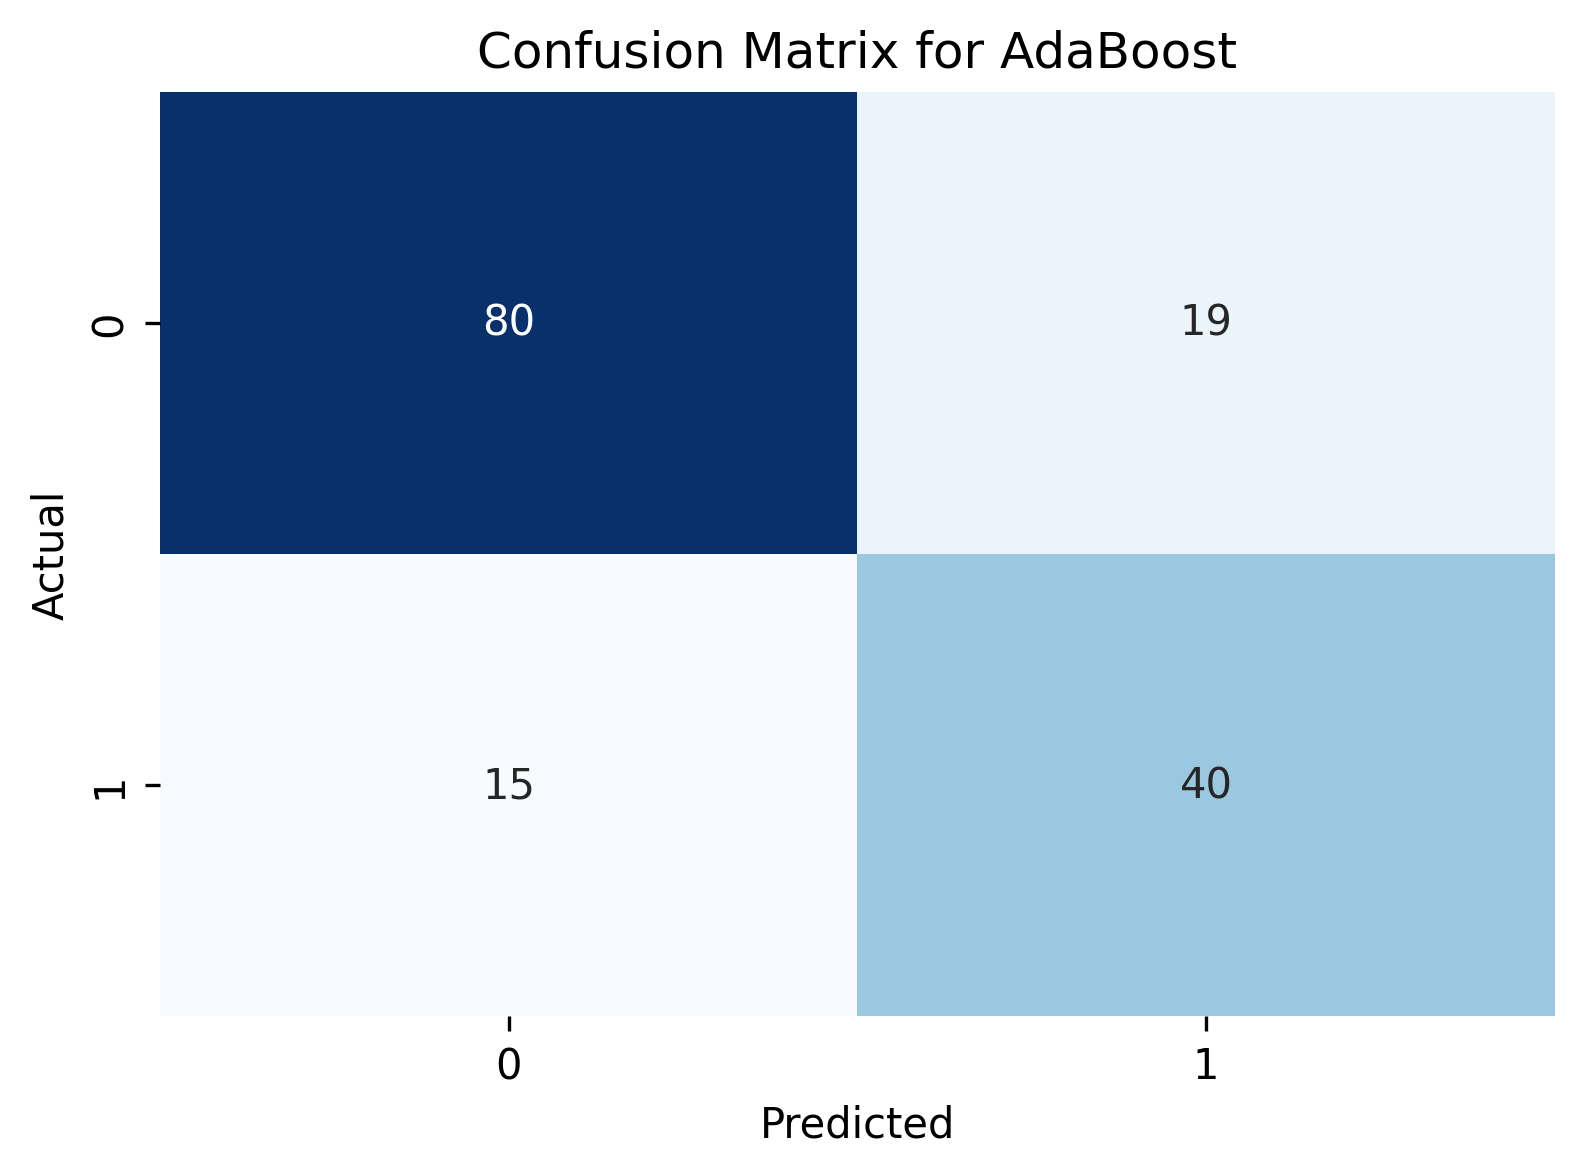


Training Bagging

Bagging Results:
Accuracy: 0.70
Confusion Matrix:
[[76 23]
 [23 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        99
           1       0.58      0.58      0.58        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



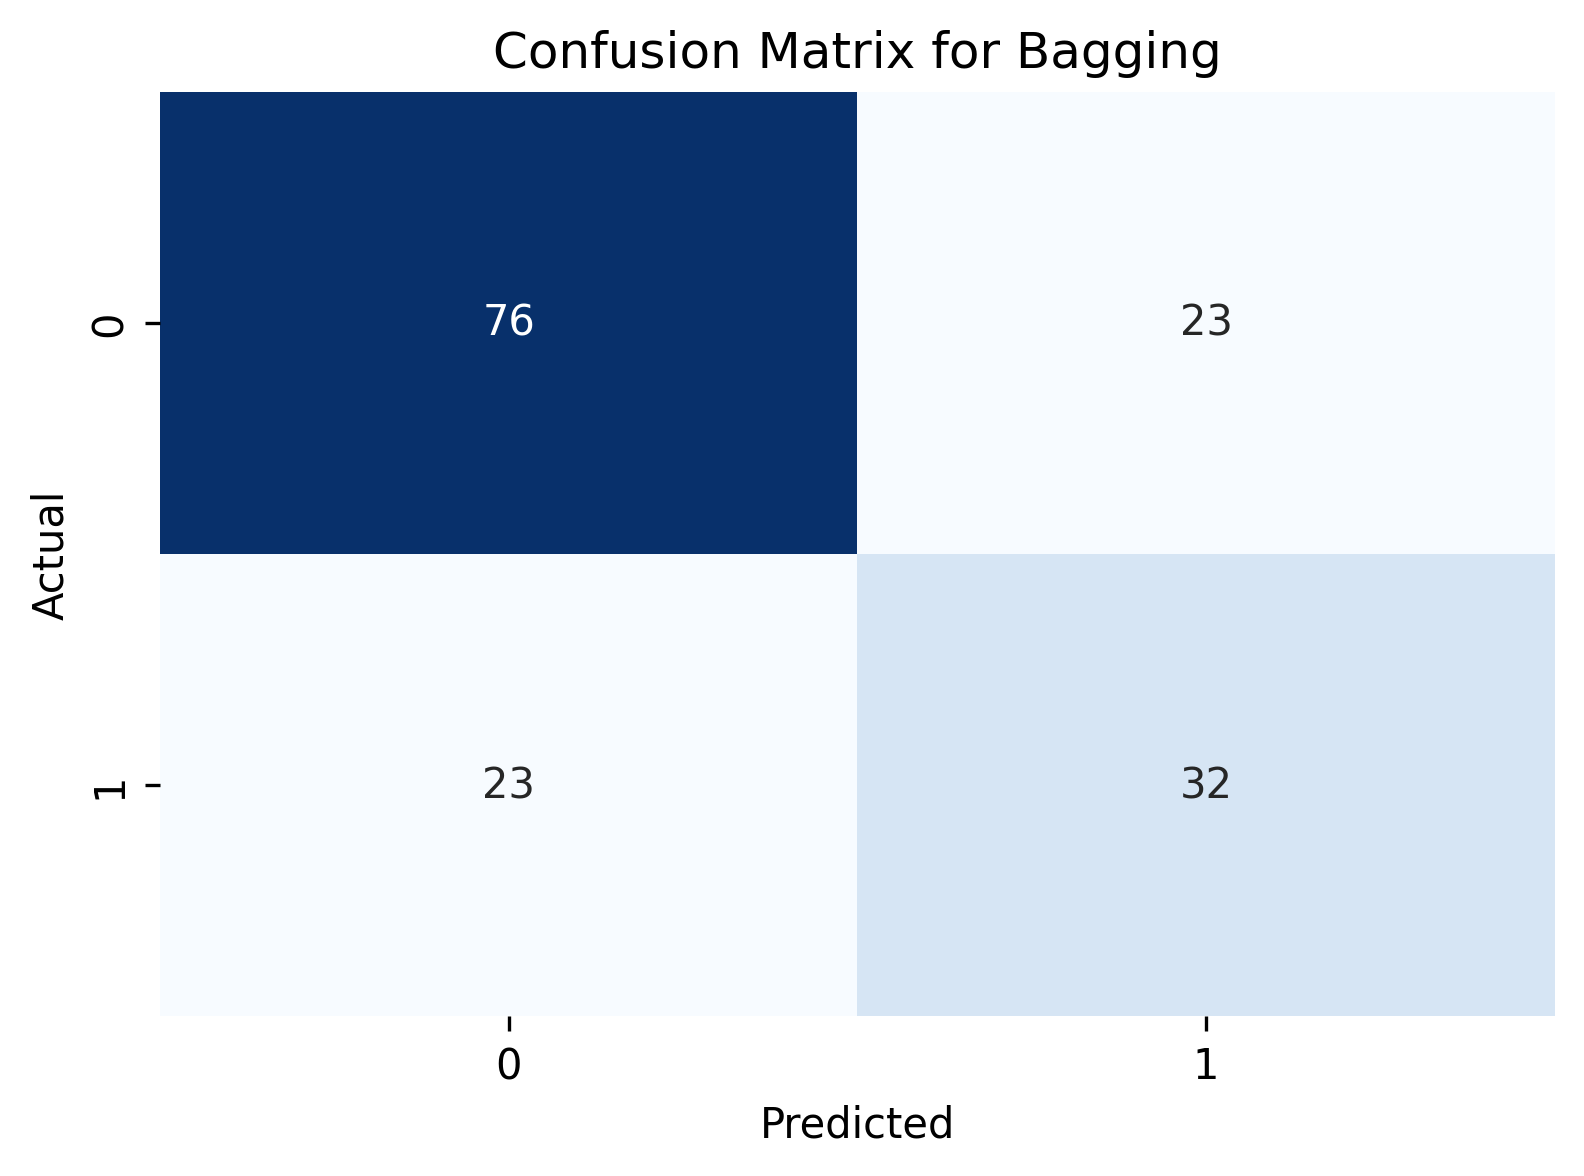


Training HistGradientBoosting

HistGradientBoosting Results:
Accuracy: 0.73
Confusion Matrix:
[[74 25]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



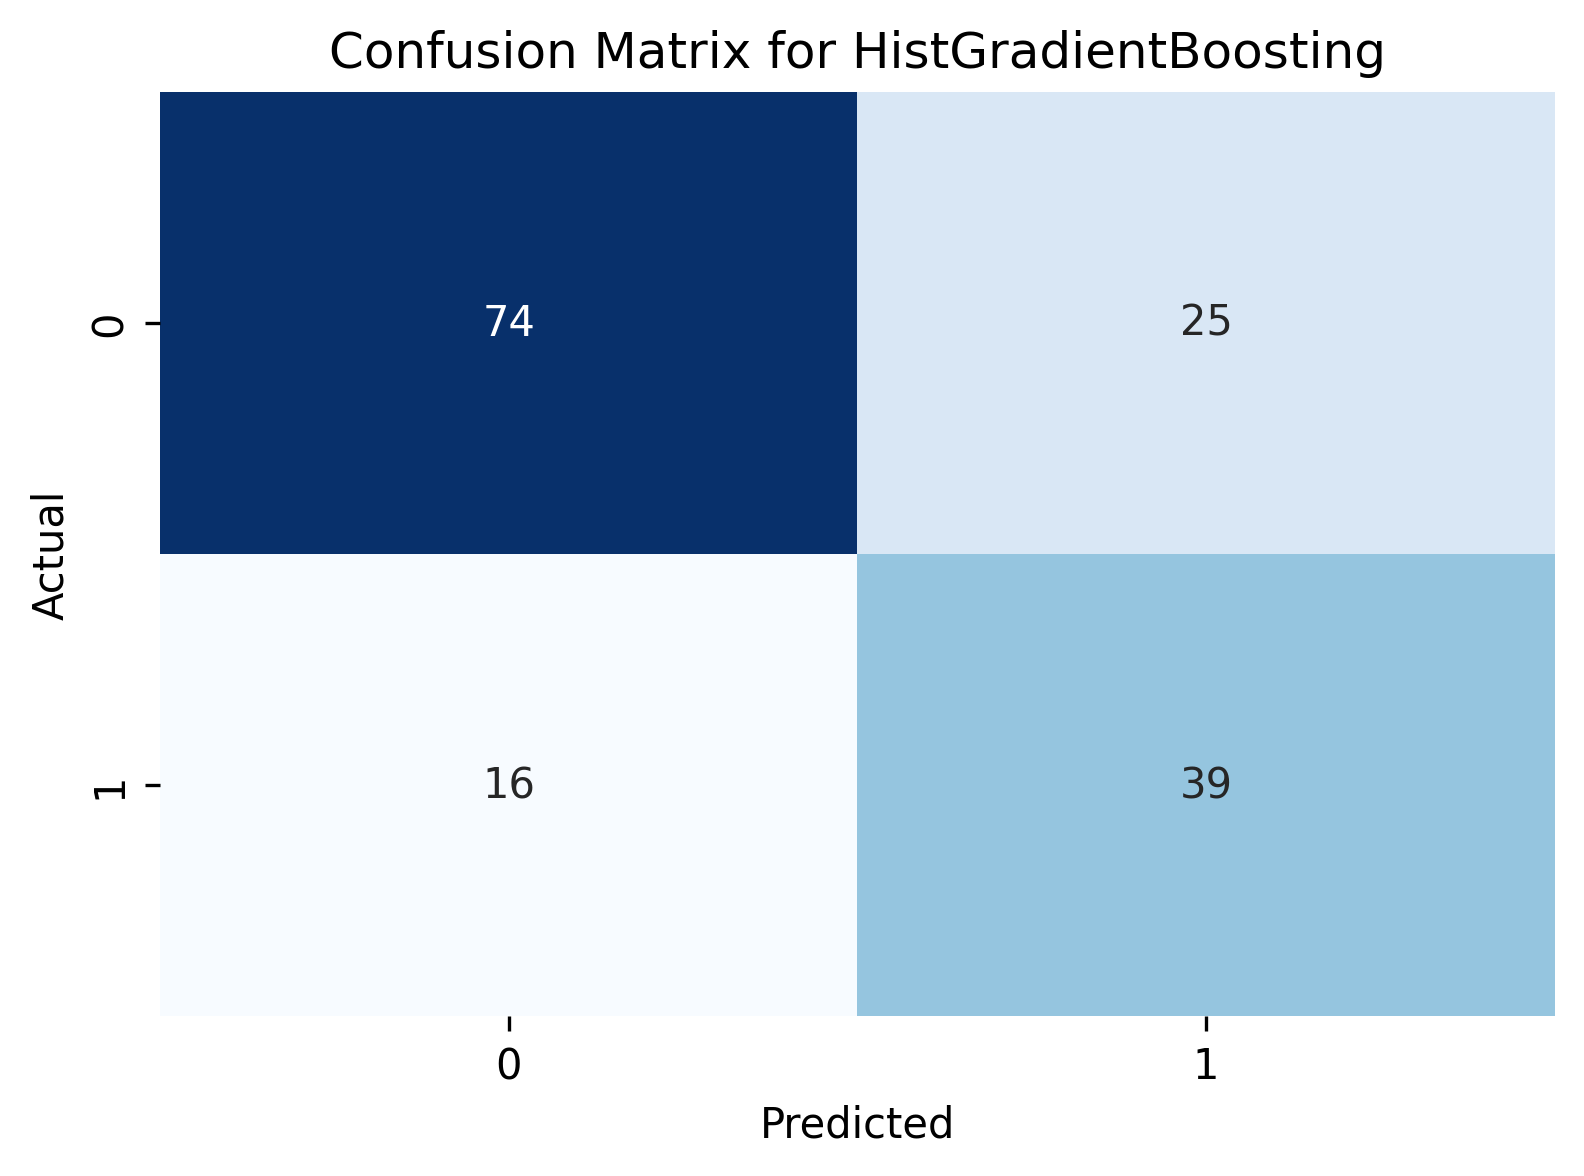


Training Linear Discriminant Analysis

Linear Discriminant Analysis Results:
Accuracy: 0.76
Confusion Matrix:
[[80 19]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



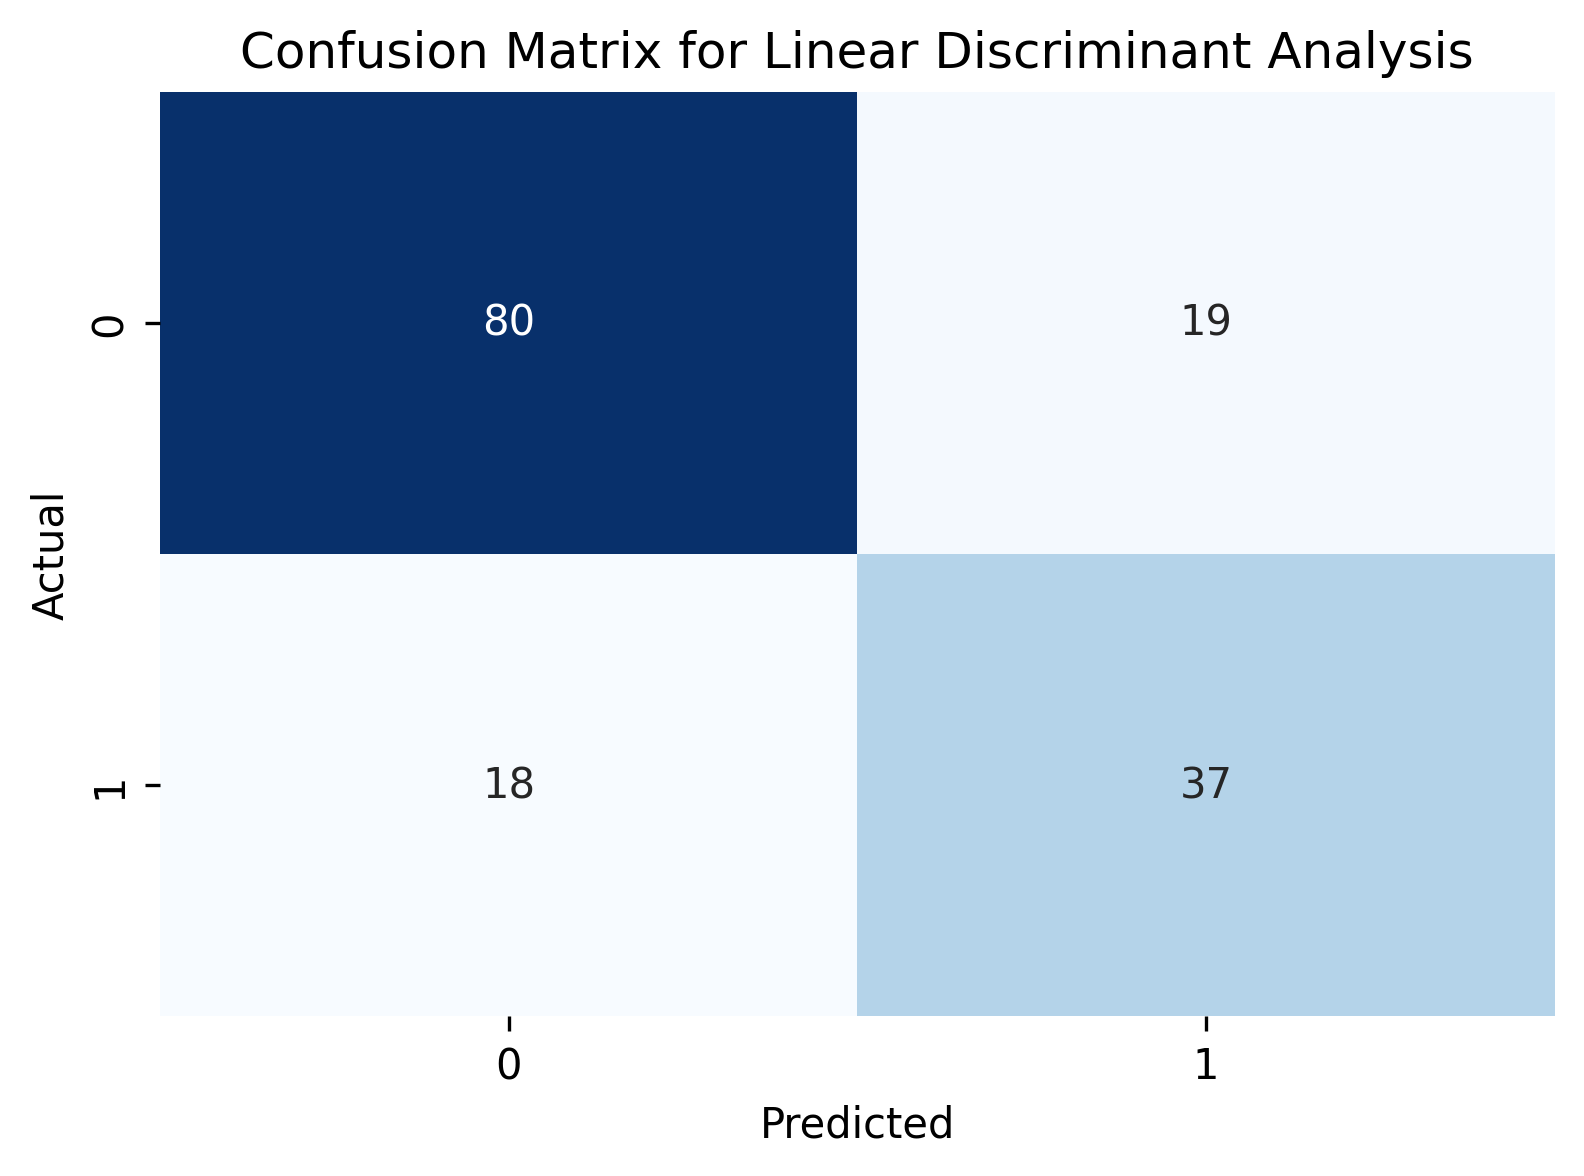

In [21]:
### this is quick way of running base classifiers
### loop grabs each classifier from dictionary(key: value), train, predict on test, plot CM


classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Support Vector Classifier': SVC(),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}


for name, clf in classifiers.items():
    print(f'\nTraining {name}')
    clf.fit(X_train, y_train)        ### Train model
    y_pred = clf.predict(X_test)     ### Predict on test set

    ### obtain evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'\n{name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    ### finally plot confusion matrix
    plt.figure(figsize=(6, 4), dpi=300)  ### added higher dpi for better viz
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Training Logistic Regression

Training Random Forest

Training Gradient Boosting

Training XGBoost

Training Support Vector Classifier

Training Linear SVM

Training Decision Tree

Training K-Nearest Neighbors

Training Naive Bayes

Training Neural Network (MLP)

Training AdaBoost

Training Bagging

Training HistGradientBoosting

Training Linear Discriminant Analysis


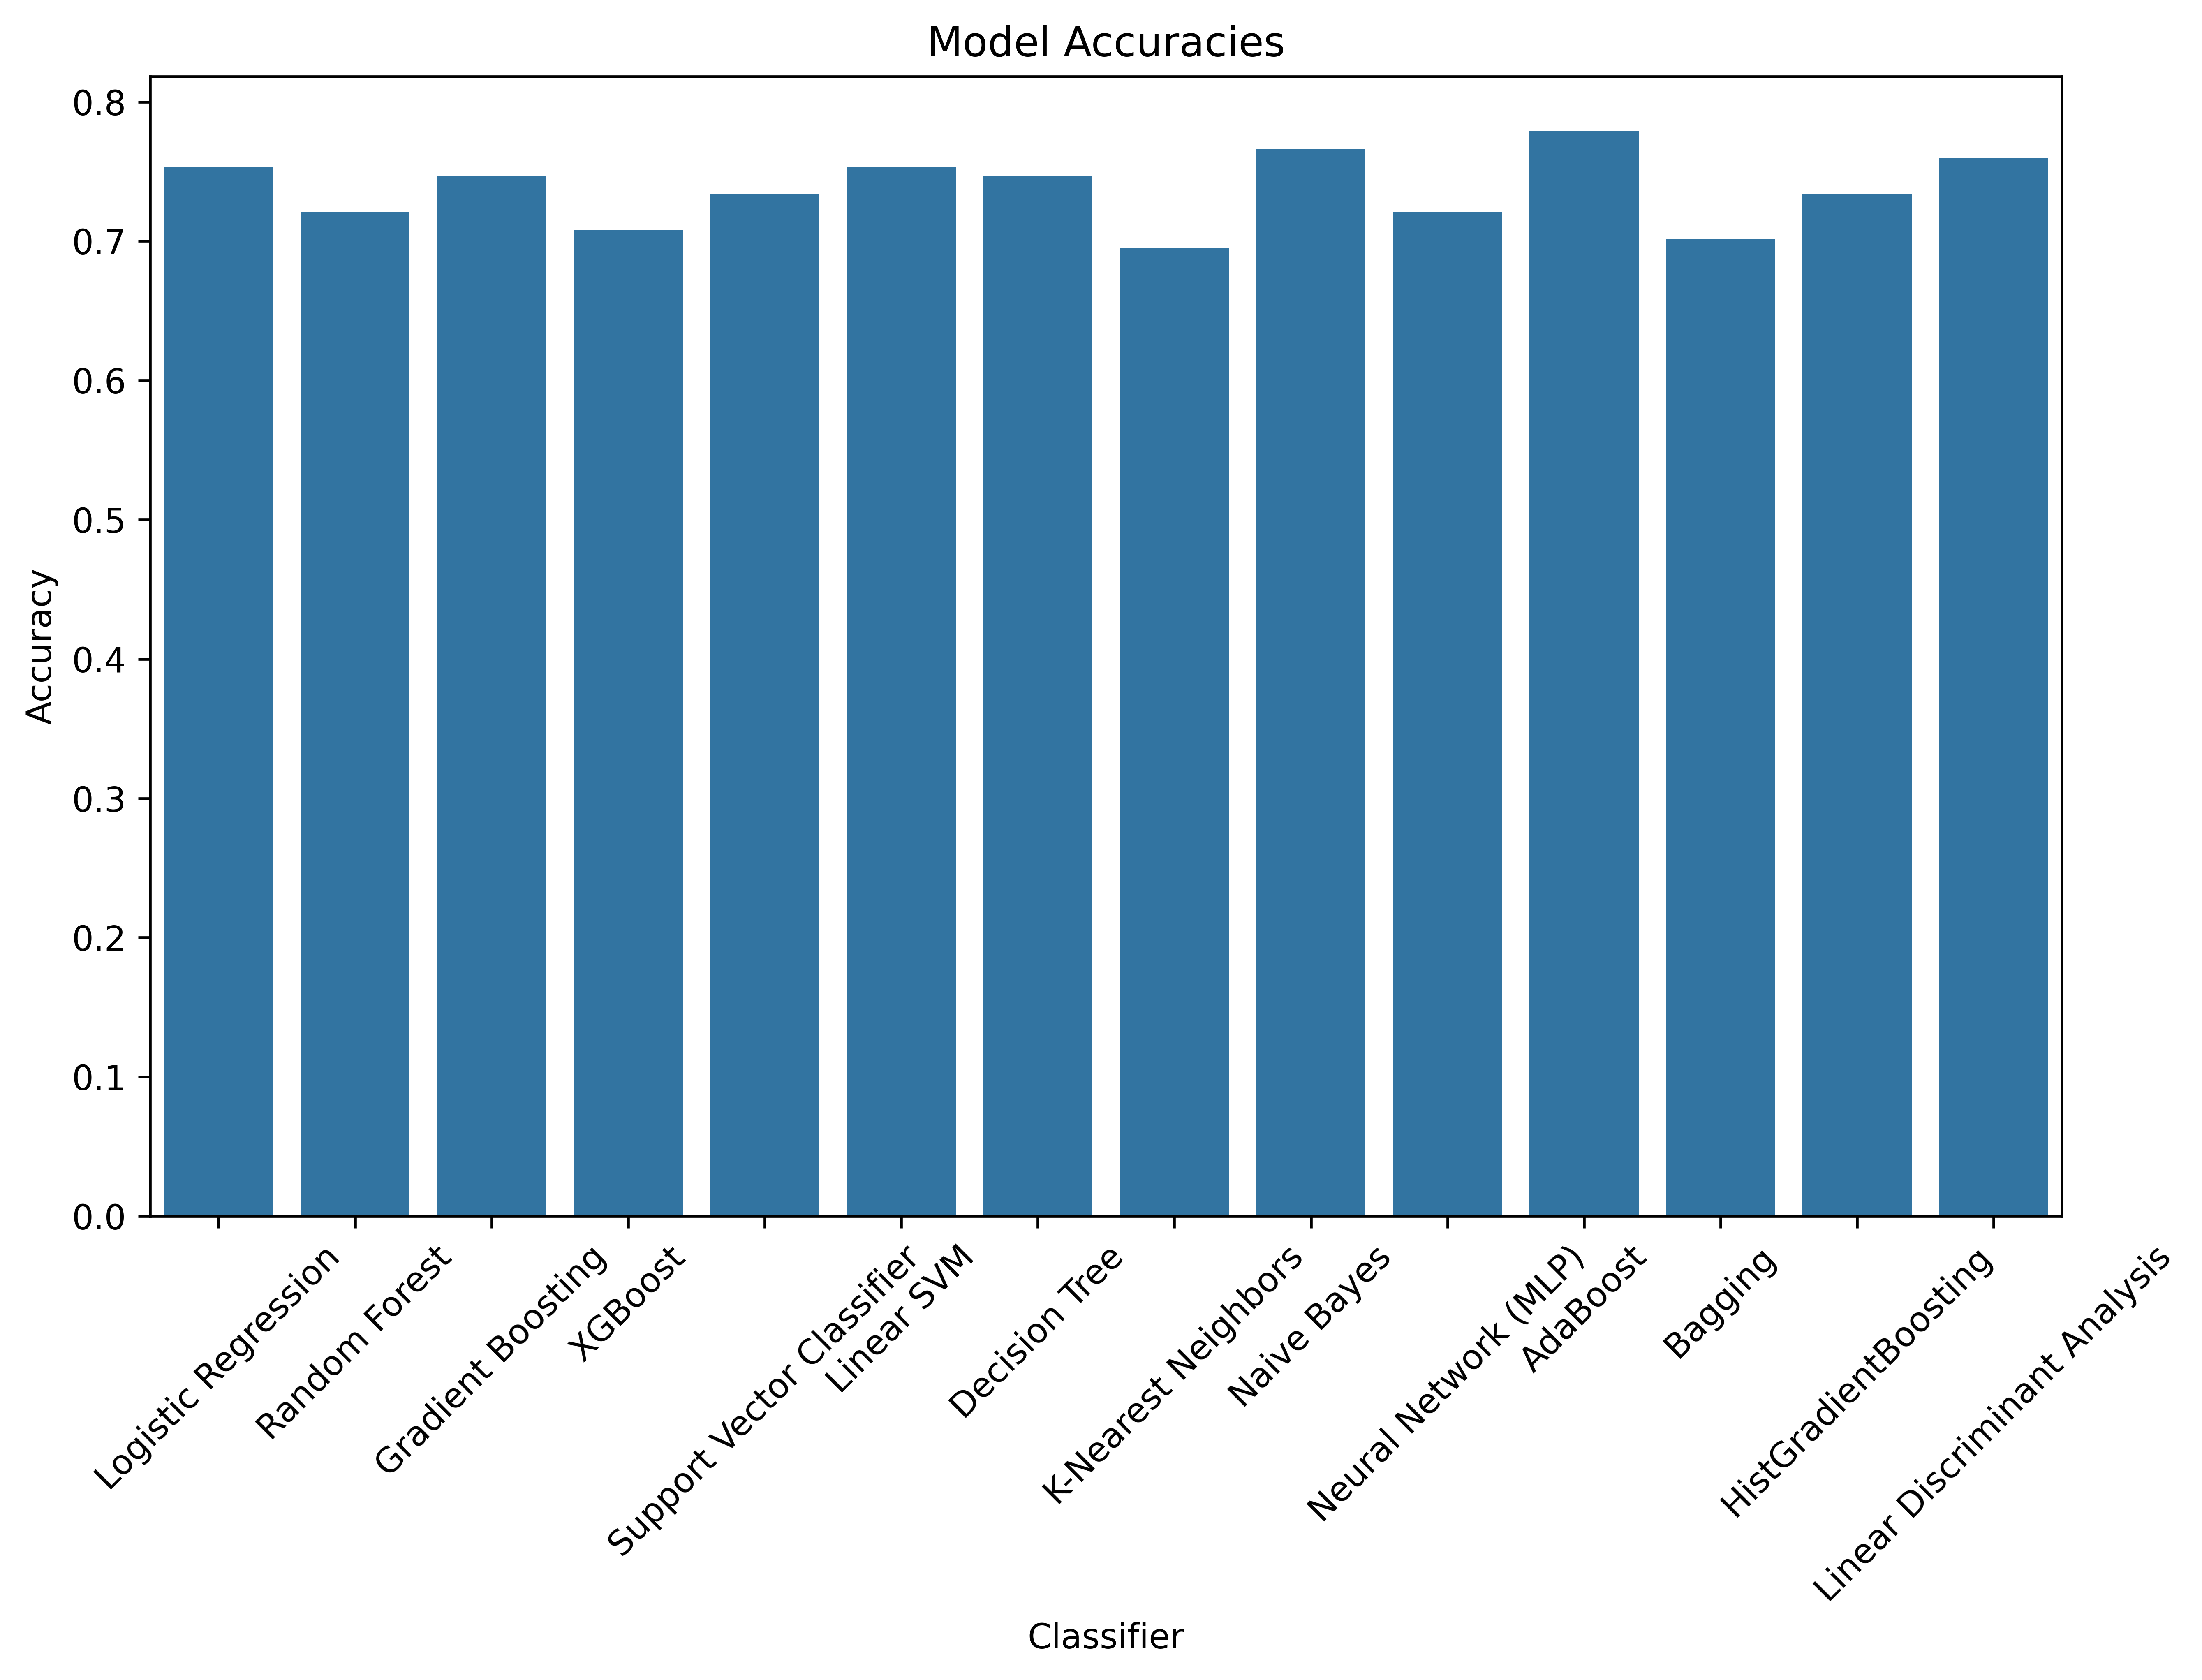

In [22]:
### Dictionary to store accuracy results
accuracy_results = {}

for name, clf in classifiers.items():
    print(f'\nTraining {name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)





### plot accuracies as bar plot
plt.figure(figsize=(10, 6), dpi=600)
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.title('Model Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

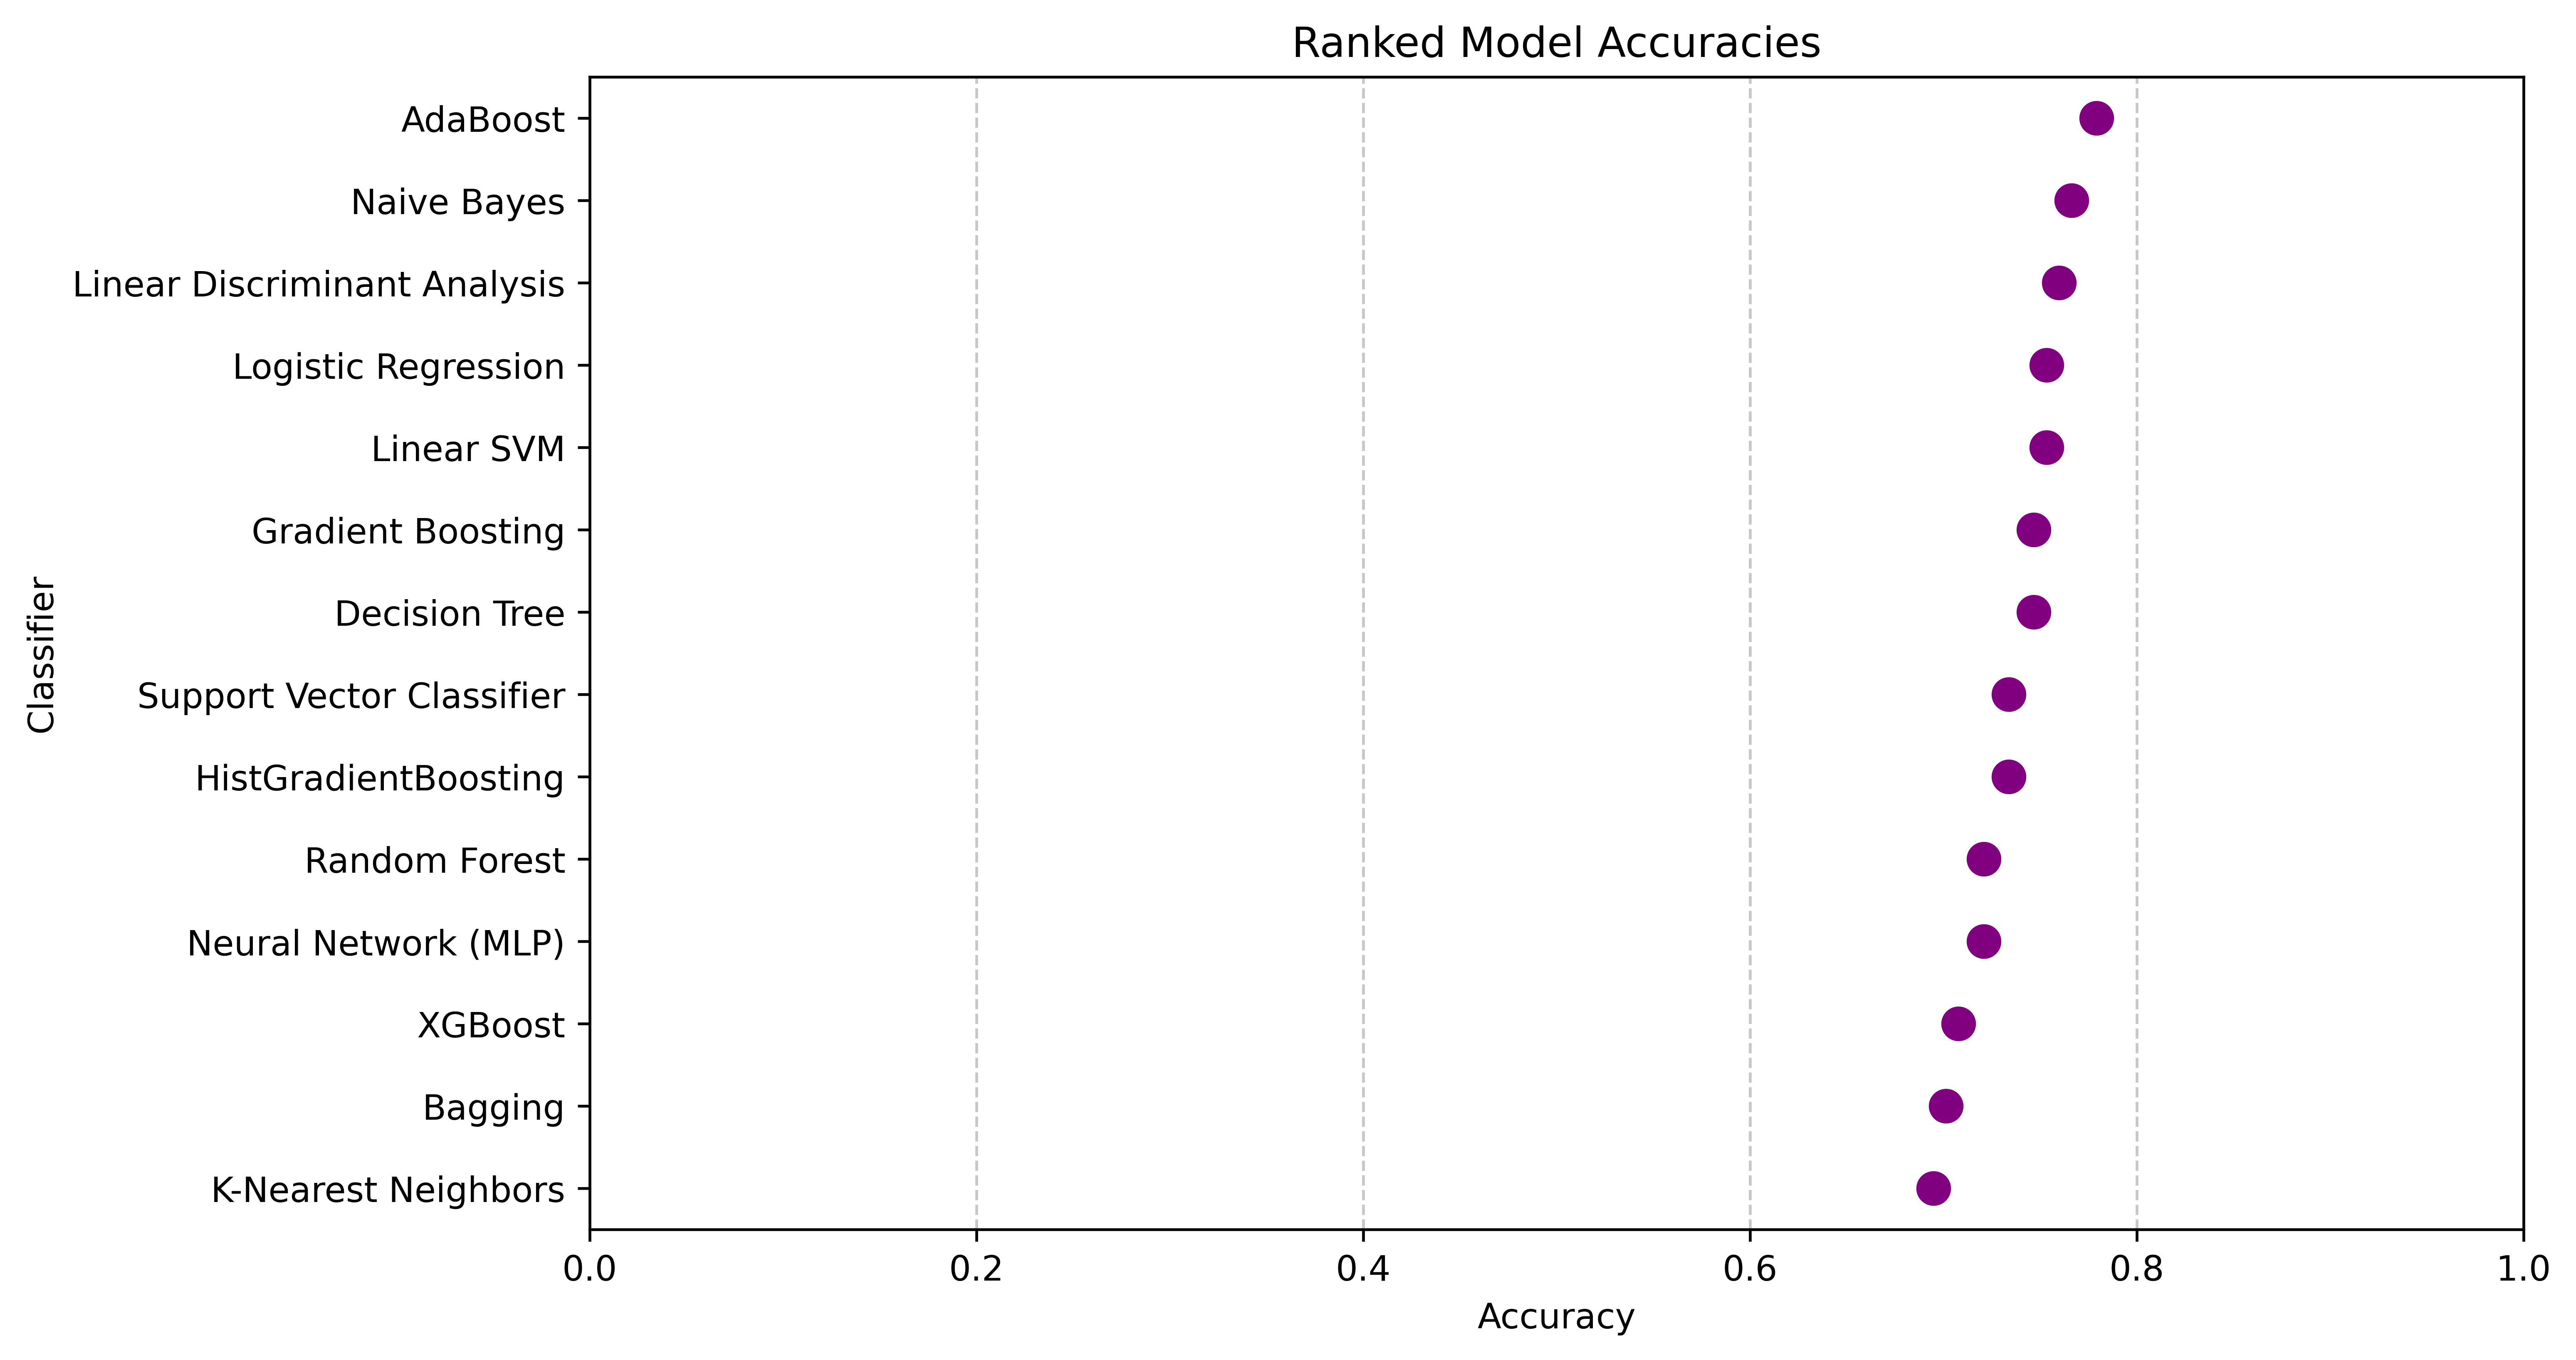

In [23]:
### ranking these models based on their accuracy
plt.figure(figsize=(10, 6), dpi=600)
sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)
sns.stripplot(
    x=[item[1] for item in sorted_results],
    y=[item[0] for item in sorted_results],
    size=10, color='purple'
)
plt.title('Ranked Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

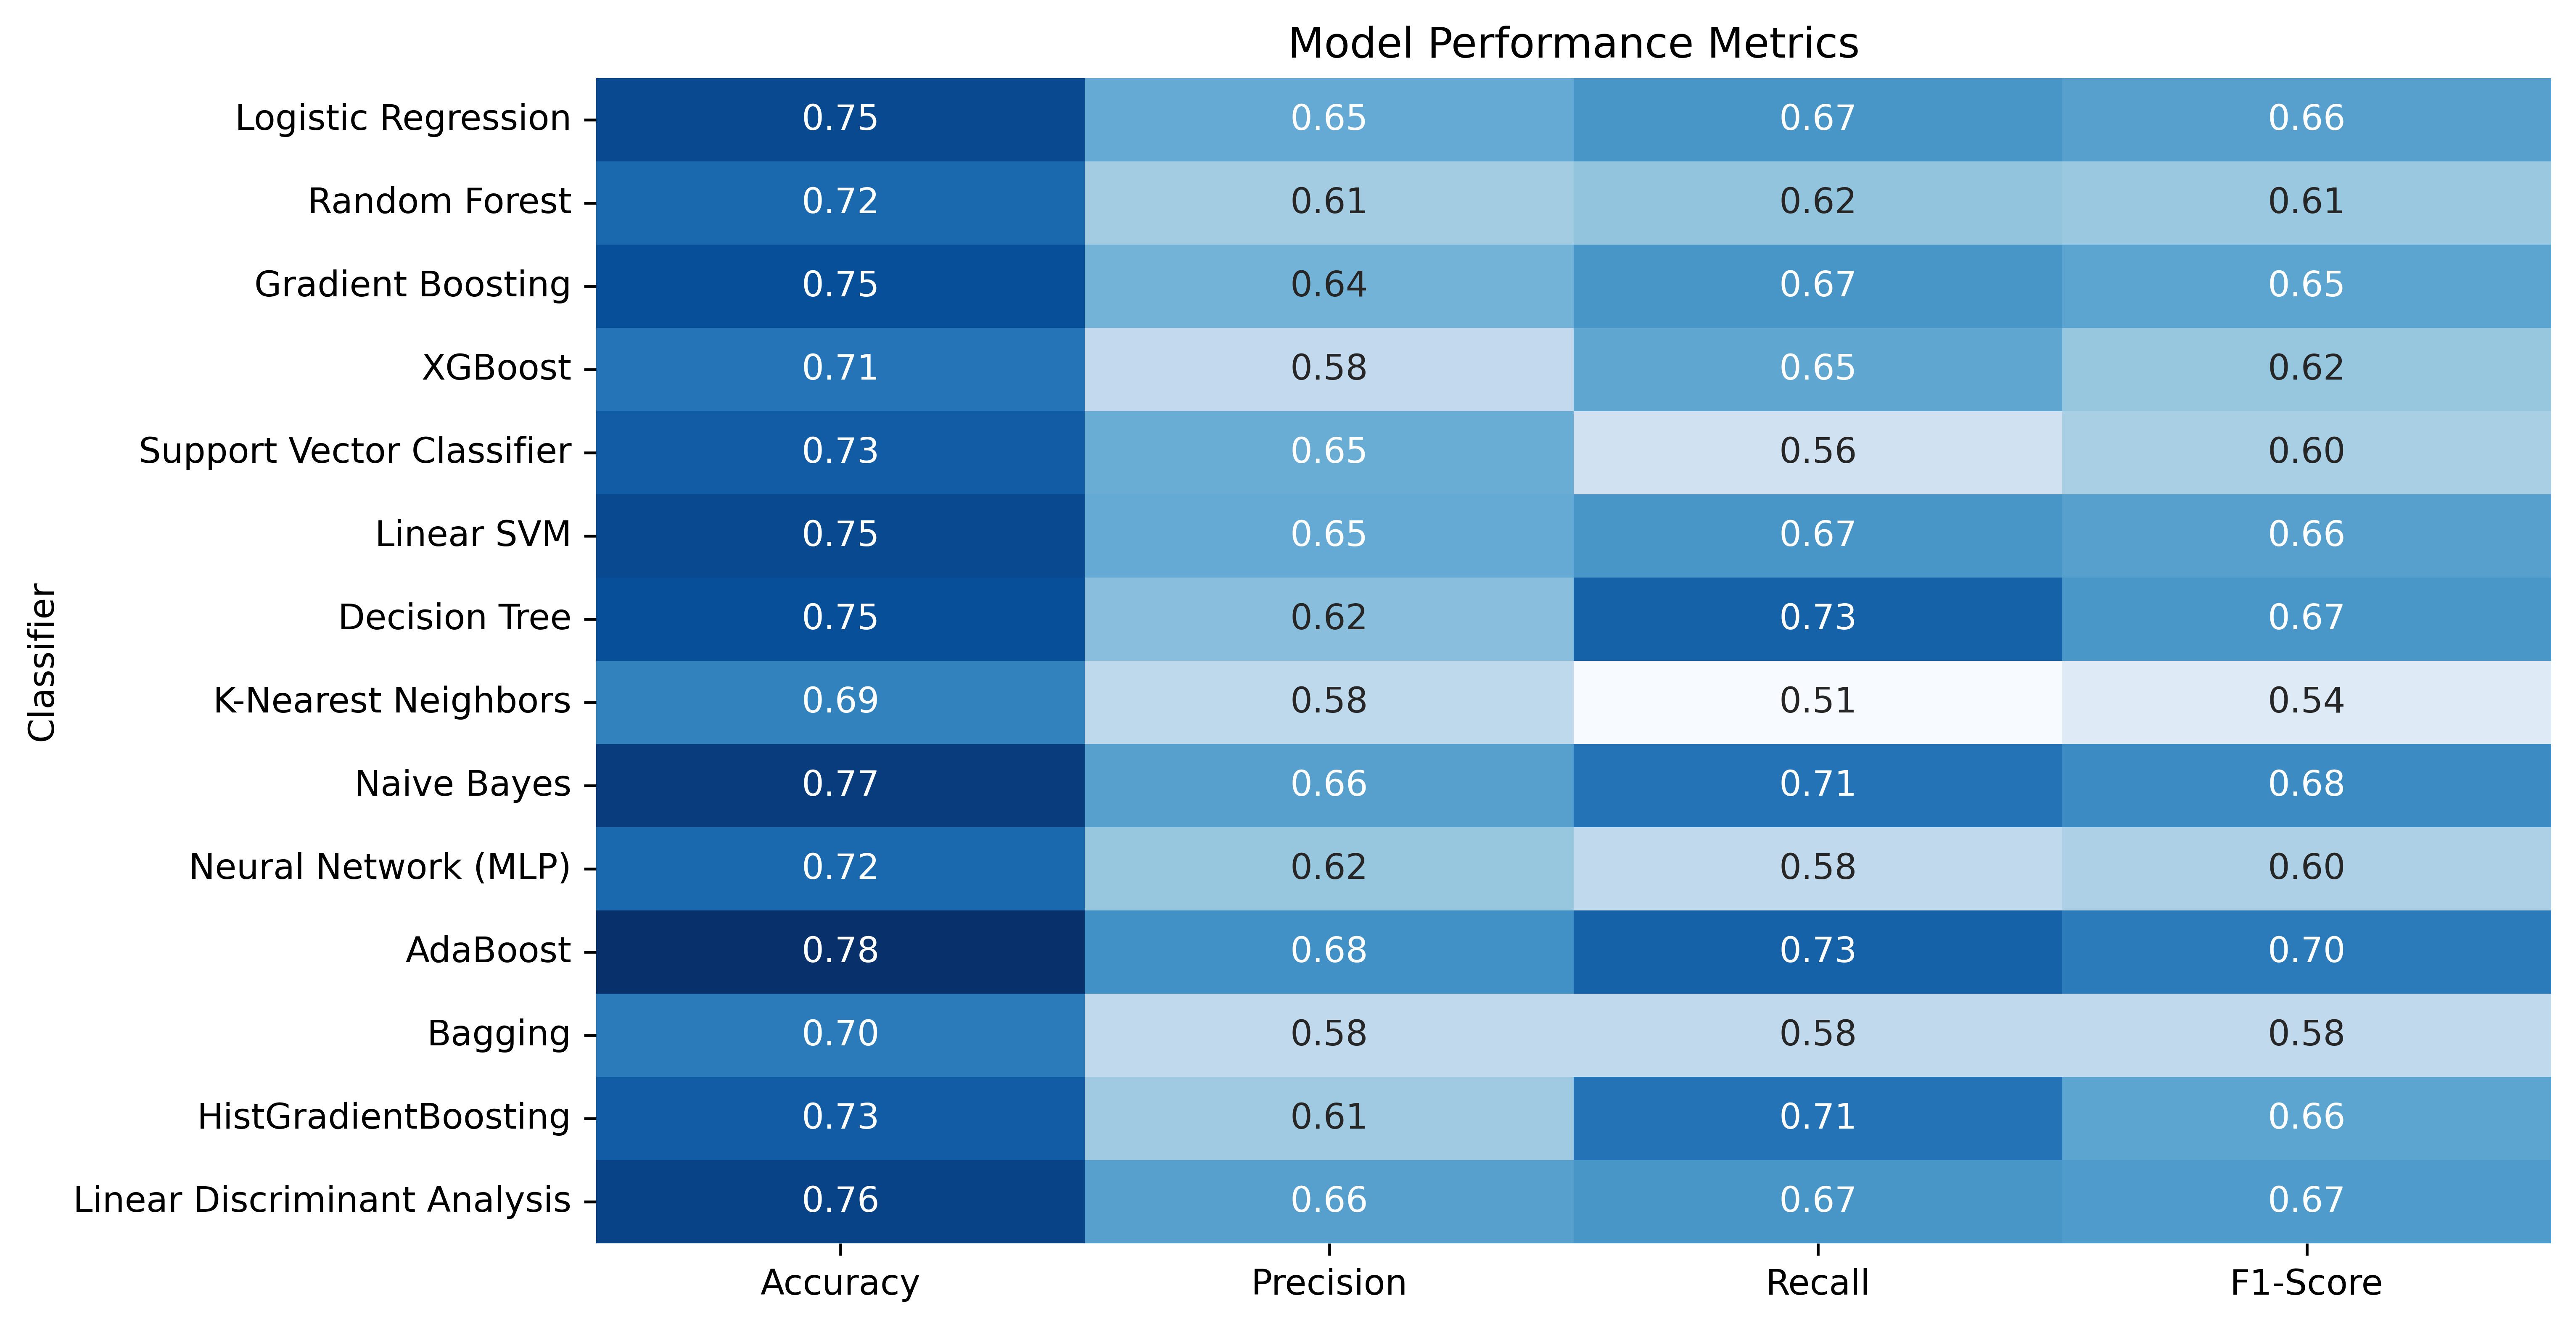

In [24]:
### obtain metrics from models
metrics_results = {
    "Classifier": list(accuracy_results.keys()),
    "Accuracy": list(accuracy_results.values()),
    "Precision": [precision_score(y_test, clf.predict(X_test)) for clf in classifiers.values()],
    "Recall": [recall_score(y_test, clf.predict(X_test)) for clf in classifiers.values()],
    "F1-Score": [f1_score(y_test, clf.predict(X_test)) for clf in classifiers.values()]
}

### Convert to DataFrame and plot heatmap
metrics_df = pd.DataFrame(metrics_results).set_index("Classifier")
plt.figure(figsize=(10, 6), dpi=600)
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Model Performance Metrics')
plt.show()

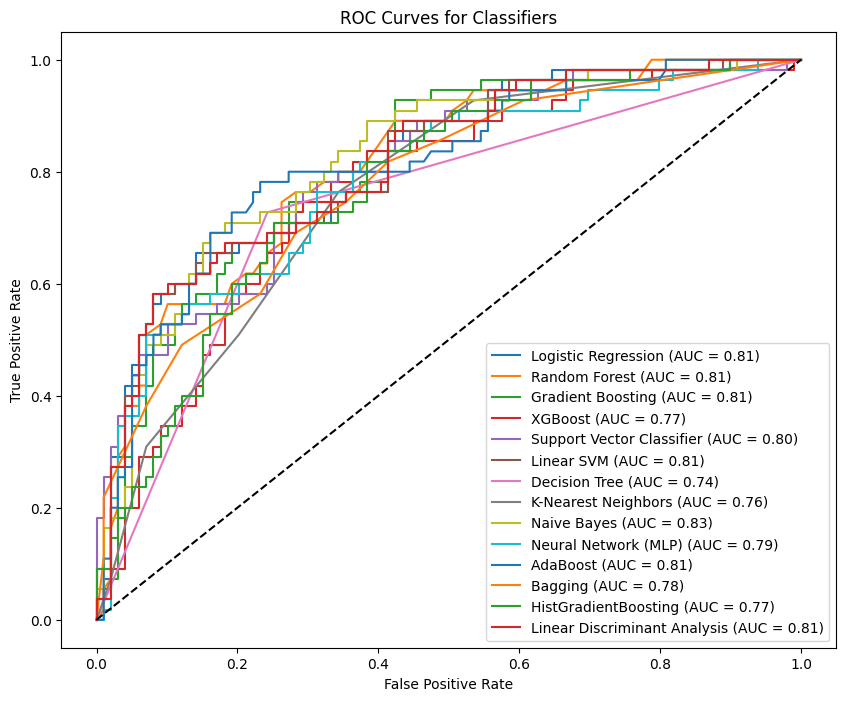

In [25]:
### AUC for classifiers
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter Optimization


Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Tuning hyperparameters for Support Vector Classifier...
Best parameters for Support Vector Classifier: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Tuning hyperparameters for Linear SVM...
Best parameters for Linear SVM: {'C': 0.1, 'penalty': 'l2'}

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 5}

Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'uniform'}

No hyperparameter tuning for Naive Bayes, using default settings.

Tuning hyper

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

HistGradientBoosting Accuracy: 0.7597
Linear Discriminant Analysis Accuracy: 0.7532


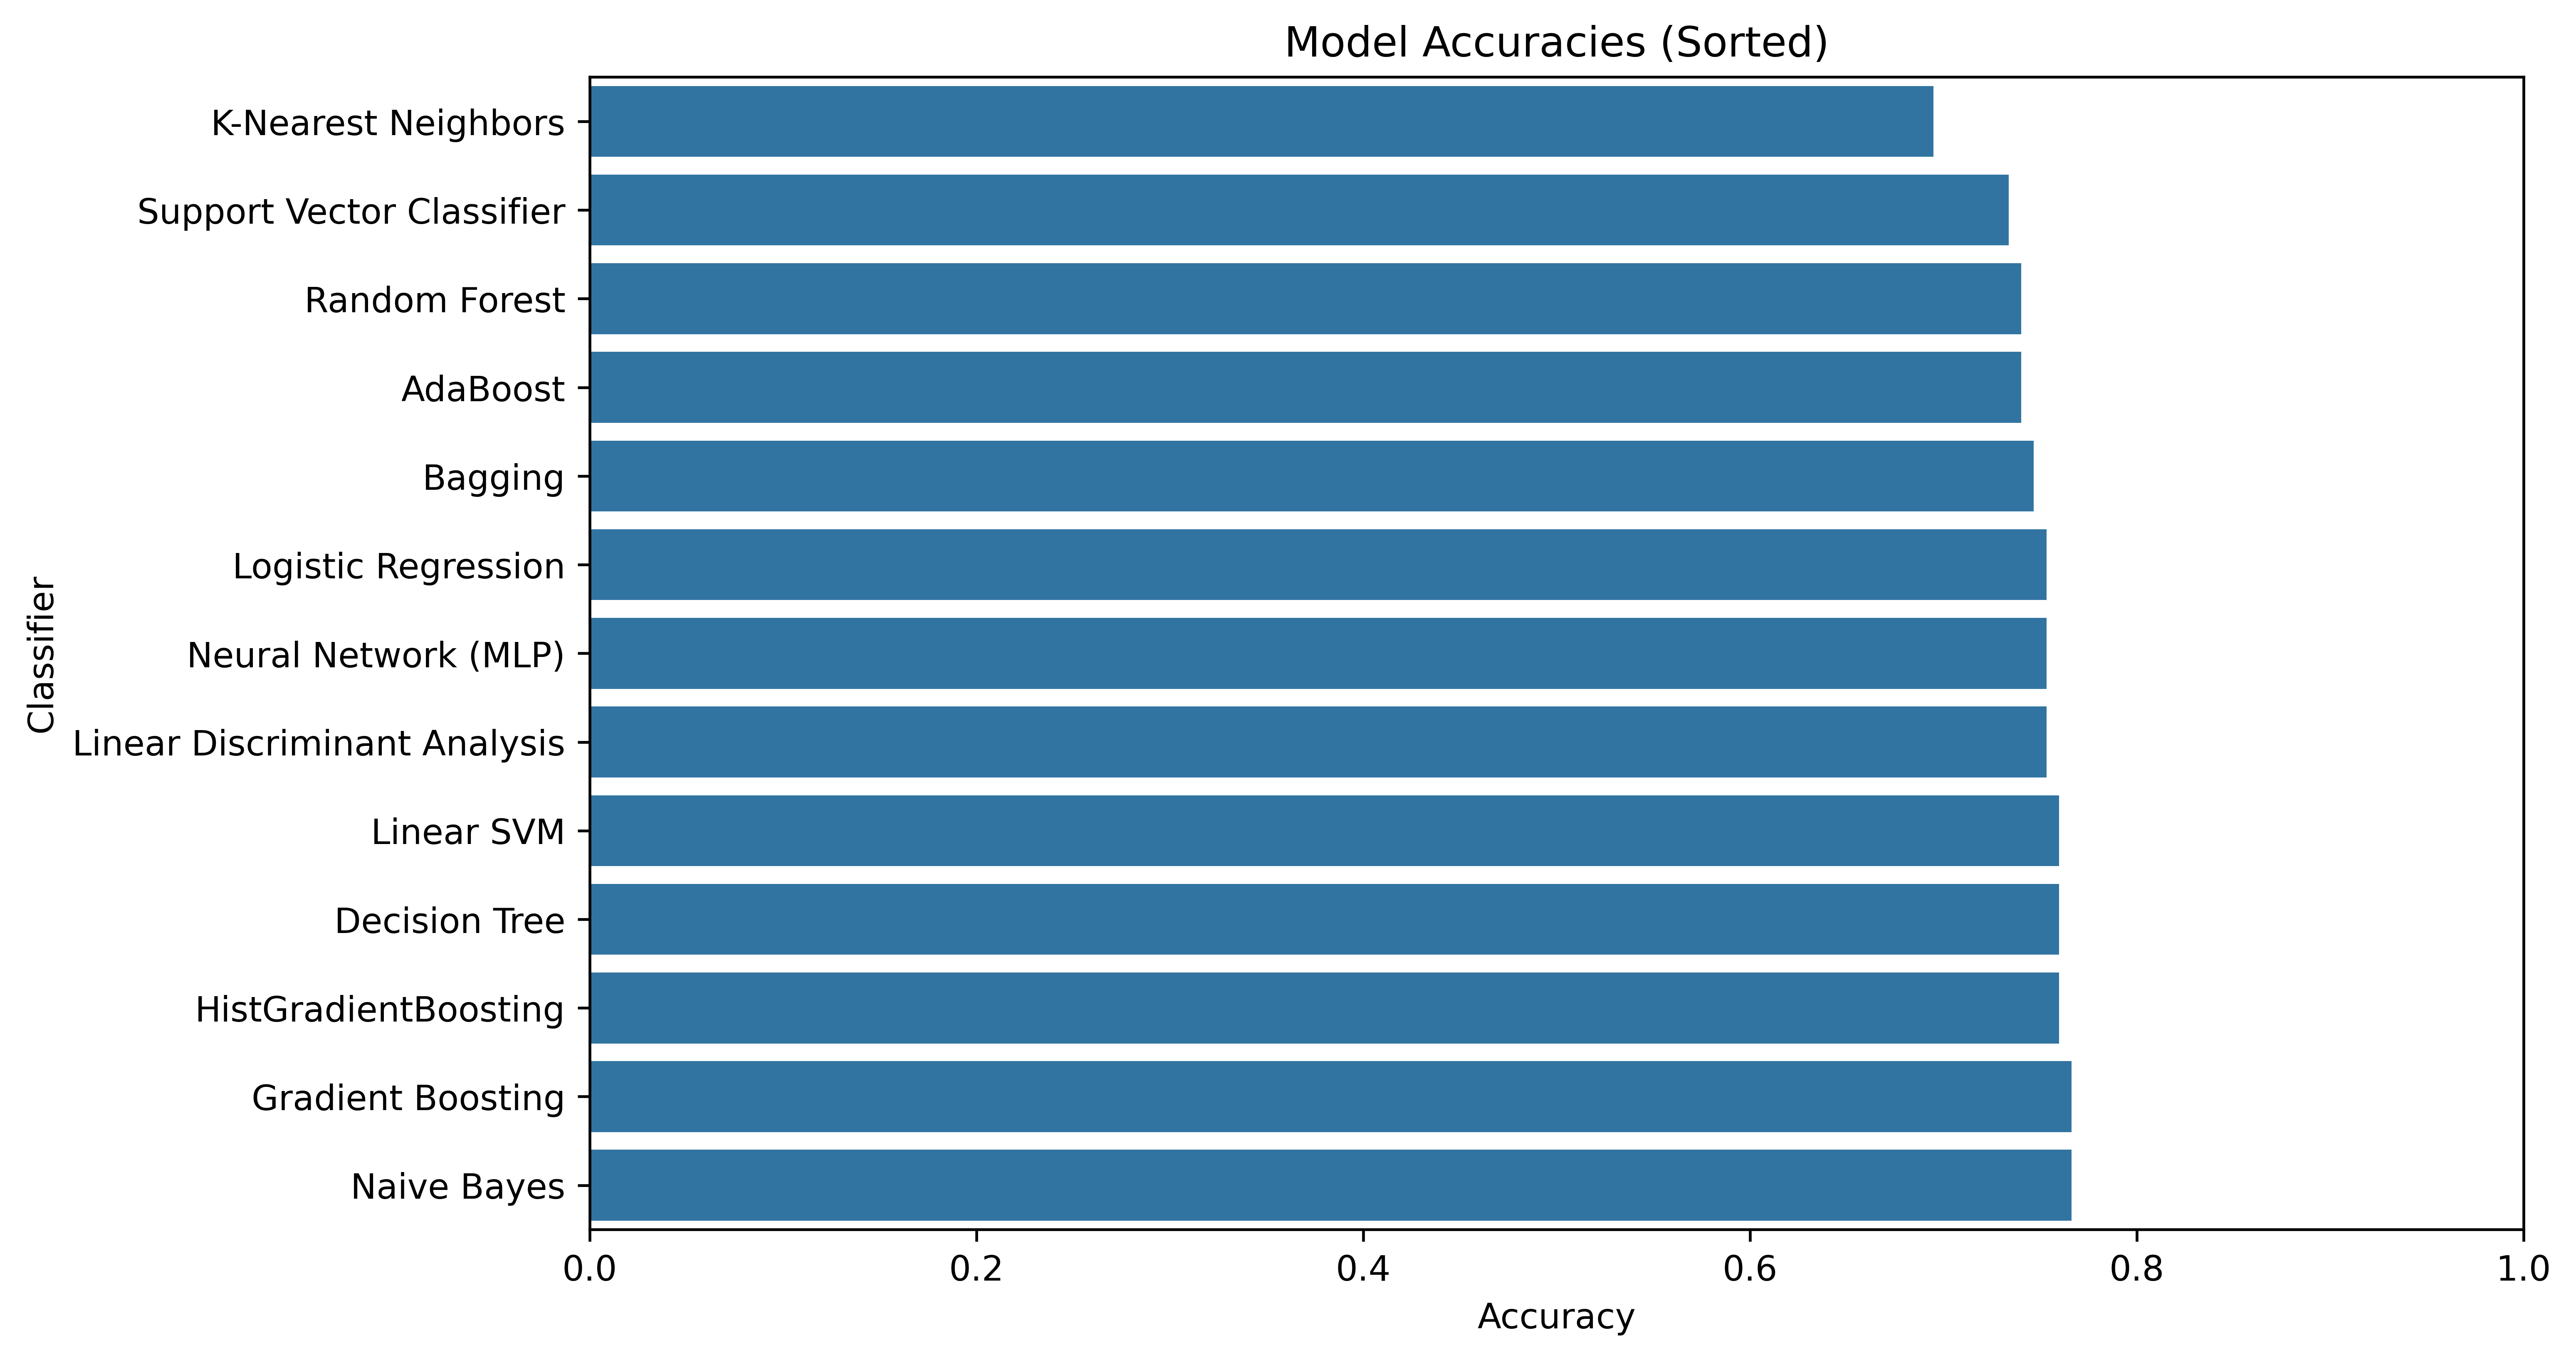

In [26]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLP)': MLPClassifier(random_state=42, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

### hyperparameter grids to check
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Linear SVM': {
        'C': [0.1, 1, 10],
        'penalty': ['l2']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Neural Network (MLP)': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'learning_rate': ['constant', 'adaptive']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.8, 1.0]
    },
    'HistGradientBoosting': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'Linear Discriminant Analysis': {
        'solver': ['svd', 'lsqr'],
        'shrinkage': [None, 'auto']
    }
}

### dictionary to store best classifiers
best_classifiers = {}

### perform hyperparameter tuning
for name, clf in classifiers.items():
    if name in param_grids:
        print(f'\nTuning hyperparameters for {name}...')
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_classifiers[name] = grid_search.best_estimator_
        print(f'Best parameters for {name}: {grid_search.best_params_}')
    else:
        print(f'\nNo hyperparameter tuning for {name}, using default settings.')
        best_classifiers[name] = clf
        best_classifiers[name].fit(X_train, y_train)

### evaluate all models
accuracy_results = {}
for name, model in best_classifiers.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

### Visualize accuracies
sorted_results = sorted(accuracy_results.items(), key=lambda x: x[1])
sorted_keys = [item[0] for item in sorted_results]
sorted_values = [item[1] for item in sorted_results]

plt.figure(figsize=(10, 6), dpi=600)
sns.barplot(x=sorted_values, y=sorted_keys, orient='h')
plt.title('Model Accuracies (Sorted)')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.xlim(0, 1)
plt.show()

                              Accuracy  Precision    Recall  F1-Score
Classifier                                                           
Logistic Regression           0.753247   0.649123  0.672727  0.660714
Random Forest                 0.740260   0.631579  0.654545  0.642857
Gradient Boosting             0.766234   0.661017  0.709091  0.684211
Support Vector Classifier     0.733766   0.645833  0.563636  0.601942
Linear SVM                    0.759740   0.660714  0.672727  0.666667
Decision Tree                 0.759740   0.645161  0.727273  0.683761
K-Nearest Neighbors           0.694805   0.583333  0.509091  0.543689
Naive Bayes                   0.766234   0.661017  0.709091  0.684211
Neural Network (MLP)          0.753247   0.654545  0.654545  0.654545
AdaBoost                      0.740260   0.627119  0.672727  0.649123
Bagging                       0.746753   0.637931  0.672727  0.654867
HistGradientBoosting          0.759740   0.655172  0.690909  0.672566
Linear Discriminant 

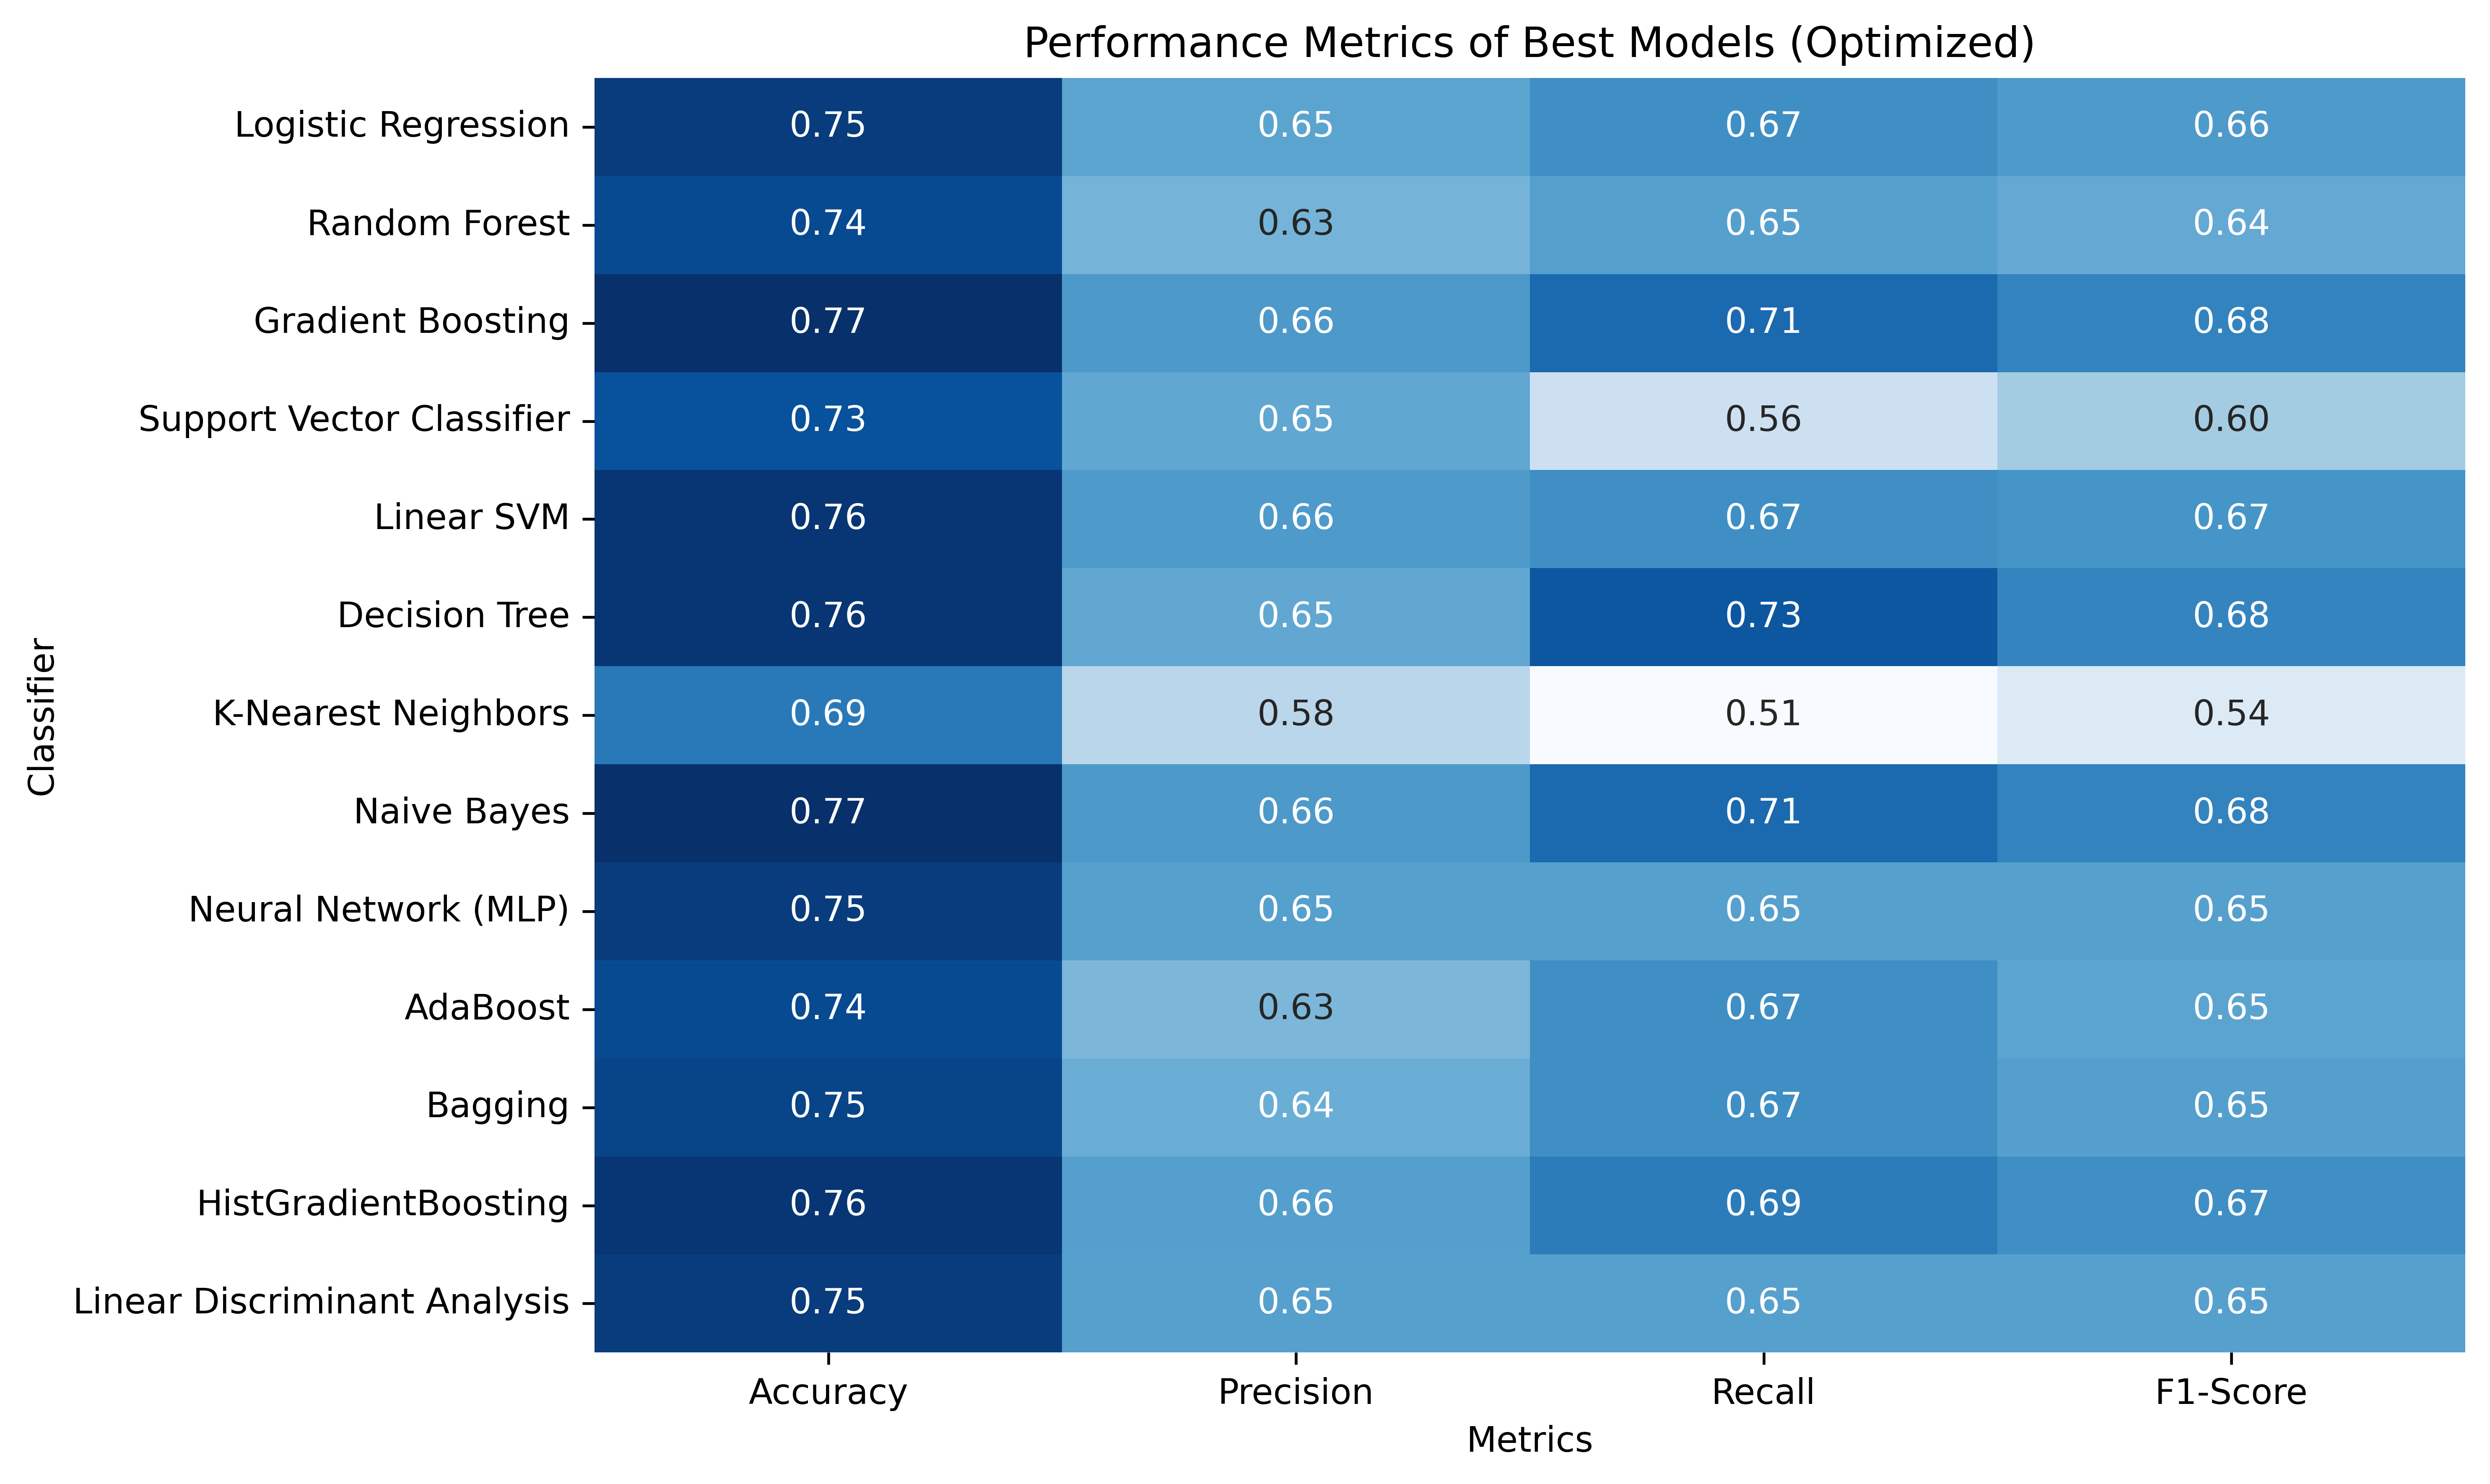

In [27]:
### Viz of Metrics from optimized best classifiers


### compute metrics for best models after optimization
metrics_results = {
    "Classifier": list(best_classifiers.keys()),
    "Accuracy": [accuracy_score(y_test, model.predict(X_test)) for model in best_classifiers.values()],
    "Precision": [precision_score(y_test, model.predict(X_test), zero_division=0) for model in best_classifiers.values()],
    "Recall": [recall_score(y_test, model.predict(X_test), zero_division=0) for model in best_classifiers.values()],
    "F1-Score": [f1_score(y_test, model.predict(X_test), zero_division=0) for model in best_classifiers.values()]
}

### convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics_results).set_index("Classifier")

### print metrics DataFrame
print(metrics_df)

### visualize metrics as heatmap
plt.figure(figsize=(10, 6), dpi=600)
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Performance Metrics of Best Models (Optimized)')
plt.xlabel('Metrics')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()

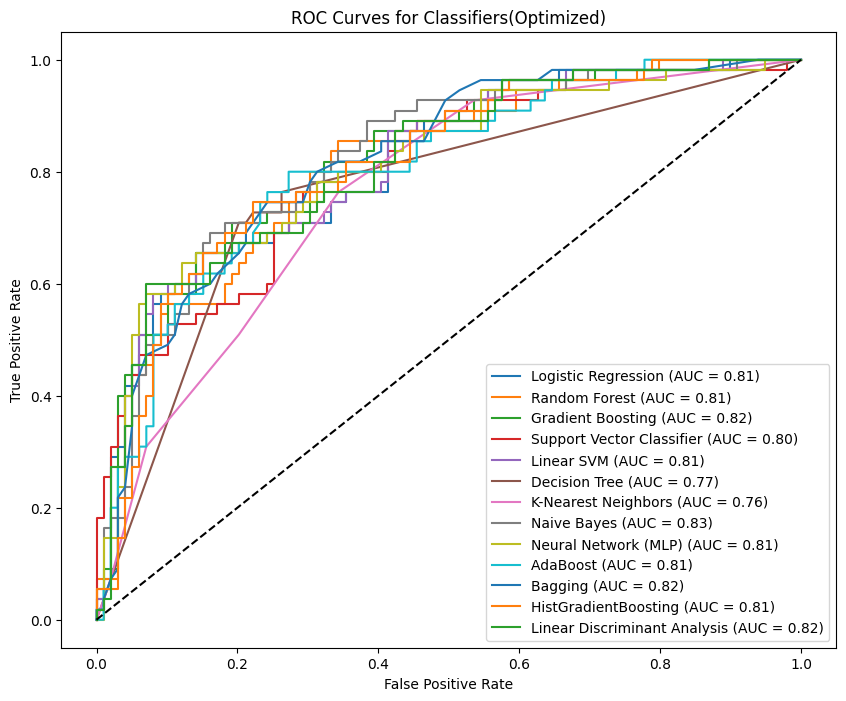

In [28]:
### AUC for best_classifiers from optimization
plt.figure(figsize=(10, 8))

for name, clf in best_classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers(Optimized)')
plt.legend(loc='lower right')
plt.show()